## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# !pip install albumentations==1.4

In [4]:
# !nvidia-smi

## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **03.01.2024** with version **YOLOv8.0.196**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [5]:
# # Pip install method (recommended)

# !pip install ultralytics==8.0.196

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [6]:
%pwd
%cd drive/MyDrive
%pwd

/content/drive/MyDrive


'/content/drive/MyDrive'

In [7]:
# !pip install -U /content/drive/MyDrive/ultralytics "ray[tune]<=2.9.3"

In [8]:
# # Git clone method (for development)
# %cd /content/drive/MyDrive
# !git clone https://github.com/ultralytics/ultralytics.git
# %cd /content/drive/MyDrive/ultralytics
# !pip install -e . -q

In [9]:
from IPython import display
display.clear_output()

import sys
sys.path.append('/content/drive/MyDrive/ultralytics')

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.5/112.6 GB disk)


In [10]:
from ultralytics import YOLO
# from ray import tune
from IPython.display import display, Image

## **DATASET Loading From Roboflow**

---



In [ ]:
# !mkdir /content/drive/MyDrive/SeatBelt_project/Robo_datasets
# %cd /content/drive/MyDrive/SeatBelt_project/Robo_datasets

# !pip install roboflow --quiet

# from roboflow import Roboflow
# project = rf.workspace("team-x-h6x7n").project("seatbelt-crkyv")
# version = project.version(1)
# dataset = version.download("yolov8")

mkdir: cannot create directory ‘/content/drive/MyDrive/SeatBelt_project/Robo_datasets’: File exists
/content/drive/MyDrive/SeatBelt_project/Robo_datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.9 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.42, to fix: `pip install ultralytics==8.0.196`


Extracting Dataset Version Zip to SeatBelt-1 in yolov8:: 100%|██████████| 4900/4900 [00:33<00:00, 147.43it/s]


In [ ]:
%cd /root/.config/Ultralytics
%ls

/root/.config/Ultralytics
settings.yaml


In [ ]:
# View the original contents of the YAML file
!cat settings.yaml

# Modify the YAML file to change the datasets_dir
!sed -i 's|datasets_dir: /content/drive/MyDrive/datasets|datasets_dir: /content/drive/MyDrive/SeatBelt_project/Robo_datasets/|g' settings.yaml

# Verify the changes
!cat settings.yaml

settings_version: 0.0.4
datasets_dir: /content/drive/MyDrive/datasets
weights_dir: /content/drive/MyDrive/ultralytics/weights
runs_dir: /content/drive/MyDrive/ultralytics/runs
uuid: 569f3ba64b326db489132663f79cd37279811de477381b83ac131e6cdd129cbb
sync: true
api_key: ''
openai_api_key: ''
clearml: true
comet: true
dvc: true
hub: true
mlflow: true
neptune: true
raytune: true
tensorboard: true
wandb: true
settings_version: 0.0.4
datasets_dir: /content/drive/MyDrive/SeatBelt_project/Robo_datasets/
weights_dir: /content/drive/MyDrive/ultralytics/weights
runs_dir: /content/drive/MyDrive/ultralytics/runs
uuid: 569f3ba64b326db489132663f79cd37279811de477381b83ac131e6cdd129cbb
sync: true
api_key: ''
openai_api_key: ''
clearml: true
comet: true
dvc: true
hub: true
mlflow: true
neptune: true
raytune: true
tensorboard: true
wandb: true


## Tuning using Ray

In [ ]:
# prompt: start the tensroboard

%load_ext tensorboard
%tensorboard --logdir /root/ray_results/_tune_2024-04-26_13-02-20


In [ ]:
from ultralytics import YOLO

# Initialize the YOLO model
model = YOLO('/content/drive/MyDrive/SeatBelt_project/All_Runs/Run_OPSGD_LR0.001/train/weights/best.pt')

# Tune hyperparameters on SeatBelt_Data for 30 epochs
model.tune(data='/content/drive/MyDrive/SeatBelt_project/Robo_datasets/SeatBelt-1/data.yaml',
            epochs=50, optimizer='SGD', plots=True, save=True, val=True,
            project='/content/drive/MyDrive/SeatBelt_project/All_Runs/Run_OPSGD_LR0.001')

Tuner: Initialized Tuner instance with 'tune_dir=/content/drive/MyDrive/SeatBelt_project/All_Runs/Run_OPSGD_LR0.001/tune'
Tuner: 💡 Learn about tuning at https://docs.ultralytics.com/guides/hyperparameter-tuning
Tuner: Starting iteration 1/10 with hyperparameters: {'lr0': 0.01, 'lrf': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'box': 7.5, 'cls': 0.5, 'dfl': 1.5, 'hsv_h': 0.015, 'hsv_s': 0.7, 'hsv_v': 0.4, 'degrees': 0.0, 'translate': 0.1, 'scale': 0.5, 'shear': 0.0, 'perspective': 0.0, 'flipud': 0.0, 'fliplr': 0.5, 'bgr': 0.0, 'mosaic': 1.0, 'mixup': 0.0, 'copy_paste': 0.0}


In [ ]:
# import shutil
# shutil.rmtree("/content/drive/MyDrive/SeatBelt_project/All_Runs/Hypertuning")

In [ ]:
model = YOLO('yolov8n.pt')
result = model.tune(data='/content/drive/MyDrive/SeatBelt_project/Robo_datasets/SeatBelt-1/data.yaml', gpu_per_trial=1,
                    iterations=20, plots=True, save=True, val=True, project='/content/drive/MyDrive/SeatBelt_project/All_Runs/Hypertuning/',
                    space={"epochs": tune.choice([50,75,100]),
                            "batch": tune.choice([16,32,64]),
                            "optimizer":tune.choice(['Adam','SGD','Adamax']),
                            "dropout": tune.choice([None,0.1, 0.2, 0.3]),
                            "freeze": tune.choice([None, 3, 5])},use_ray=True)

Output hidden; open in https://colab.research.google.com to view.



##Tuning Results visualisation

In [ ]:
experiment_path = "/content/drive/MyDrive/SeatBelt_project/ultralytics/runs/detect/tune8/_tune_2024-04-26_13-02-20"
print(f"Loading results from {experiment_path}...")

restored_tuner = tune.Tuner.restore(experiment_path, trainable="_tune")
result_grid = restored_tuner.get_results()

Loading results from /content/drive/MyDrive/SeatBelt_project/ultralytics/runs/detect/tune8/_tune_2024-04-26_13-02-20...


In [ ]:
if result_grid.errors:
    print("One or more trials failed!")
else:
    print("No errors!")

No errors!


In [ ]:
for i, result in enumerate(result_grid):
    print(f"Trial #{i}: Configuration: {result.config}, Last Reported Metrics: {result.metrics}")

Trial #0: Configuration: {'epochs': 50, 'batch': 32, 'optimizer': 'Adamax', 'dropout': None, 'freeze': 3, 'data': '/content/drive/MyDrive/SeatBelt_project/Robo_datasets/SeatBelt-1/data.yaml', 'plots': True, 'save': True, 'val': True, 'project': '/content/drive/MyDrive/SeatBelt_project/All_Runs/Hypertuning/'}, Last Reported Metrics: {'metrics/precision(B)': 0.8170024391702285, 'metrics/recall(B)': 0.8662604850145408, 'metrics/mAP50(B)': 0.9048295656785936, 'metrics/mAP50-95(B)': 0.5612045169292182, 'fitness': 0.5955670218041558, 'timestamp': 1714143740, 'checkpoint_dir_name': None, 'done': True, 'training_iteration': 52, 'trial_id': '3743a_00013', 'date': '2024-04-26_15-02-20', 'time_this_iter_s': 1.6873550415039062, 'time_total_s': 1035.086501121521, 'pid': 9077, 'hostname': 'b32edeb24e5d', 'node_ip': '172.28.0.12', 'config': {'epochs': 50, 'batch': 32, 'optimizer': 'Adamax', 'dropout': None, 'freeze': 3, 'data': '/content/drive/MyDrive/SeatBelt_project/Robo_datasets/SeatBelt-1/data.ya

In [ ]:
# Iterate over results
for i, result in enumerate(result_grid):
    if result.error:
        print(f"Trial #{i} had an error:", result.error)
        continue

    print(
        f"Trial #{i} finished successfully with a mean accuracy metric of:",
        result.metrics["metrics/mAP50(B)"]
    )

Trial #0 finished successfully with a mean accuracy metric of: 0.9048295656785936
Trial #1 finished successfully with a mean accuracy metric of: 0.59829
Trial #2 finished successfully with a mean accuracy metric of: 0.39601
Trial #3 finished successfully with a mean accuracy metric of: 0.891942297622921
Trial #4 finished successfully with a mean accuracy metric of: 0.00607
Trial #5 finished successfully with a mean accuracy metric of: 0.27312
Trial #6 finished successfully with a mean accuracy metric of: 0.63981
Trial #7 finished successfully with a mean accuracy metric of: 0.861518126378874
Trial #8 finished successfully with a mean accuracy metric of: 0.00805
Trial #9 finished successfully with a mean accuracy metric of: 0.20095
Trial #10 finished successfully with a mean accuracy metric of: 0.88676
Trial #11 finished successfully with a mean accuracy metric of: 0.1449
Trial #12 finished successfully with a mean accuracy metric of: 0.12216
Trial #13 finished successfully with a mean 

In [ ]:
from ray.train import Result

# Get the result with the maximum test set `mean_accuracy`
best_result: Result = result_grid.get_best_result(metric="metrics/mAP50(B)",mode="max")

# Get the result with the minimum `mean_accuracy`
worst_performing_result: Result = result_grid.get_best_result(
    metric="metrics/mAP50(B)", mode="min"
)

In [ ]:
best_result.config

{'epochs': 50,
 'batch': 32,
 'optimizer': 'Adamax',
 'dropout': None,
 'freeze': 3,
 'data': '/content/drive/MyDrive/SeatBelt_project/Robo_datasets/SeatBelt-1/data.yaml',
 'plots': True,
 'save': True,
 'val': True,
 'project': '/content/drive/MyDrive/SeatBelt_project/All_Runs/Hypertuning/'}

In [ ]:
best_result.path

'/content/drive/MyDrive/SeatBelt_project/ultralytics/runs/detect/tune8/_tune_2024-04-26_13-02-20/_tune_3743a_00013_13_batch=32,dropout=None,epochs=50,freeze=3,optimizer=Adamax_2024-04-26_13-02-20'

In [ ]:
# Get the last reported set of metrics
best_result.metrics

{'metrics/precision(B)': 0.8170024391702285,
 'metrics/recall(B)': 0.8662604850145408,
 'metrics/mAP50(B)': 0.9048295656785936,
 'metrics/mAP50-95(B)': 0.5612045169292182,
 'fitness': 0.5955670218041558,
 'timestamp': 1714143740,
 'checkpoint_dir_name': None,
 'done': True,
 'training_iteration': 52,
 'trial_id': '3743a_00013',
 'date': '2024-04-26_15-02-20',
 'time_this_iter_s': 1.6873550415039062,
 'time_total_s': 1035.086501121521,
 'pid': 9077,
 'hostname': 'b32edeb24e5d',
 'node_ip': '172.28.0.12',
 'config': {'epochs': 50,
  'batch': 32,
  'optimizer': 'Adamax',
  'dropout': None,
  'freeze': 3,
  'data': '/content/drive/MyDrive/SeatBelt_project/Robo_datasets/SeatBelt-1/data.yaml',
  'plots': True,
  'save': True,
  'val': True,
  'project': '/content/drive/MyDrive/SeatBelt_project/All_Runs/Hypertuning/'},
 'time_since_restore': 1035.086501121521,
 'iterations_since_restore': 52,
 'experiment_tag': '13_batch=32,dropout=None,epochs=50,freeze=3,optimizer=Adamax'}

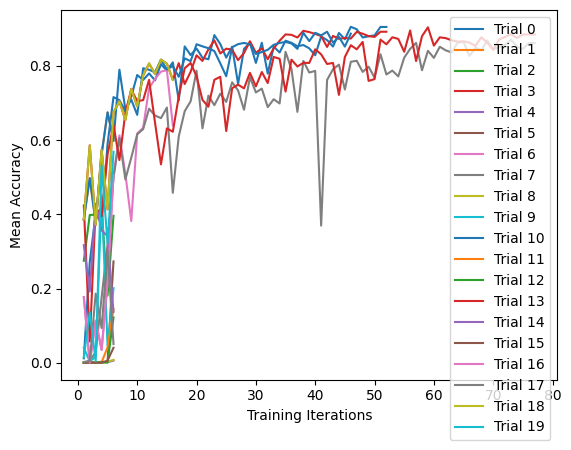

In [ ]:
import matplotlib.pyplot as plt

for i, result in enumerate(result_grid):
    plt.plot(result.metrics_dataframe["training_iteration"], result.metrics_dataframe["metrics/mAP50(B)"], label=f"Trial {i}")

plt.xlabel('Training Iterations')
plt.ylabel('Mean Accuracy')
plt.legend()
plt.show()

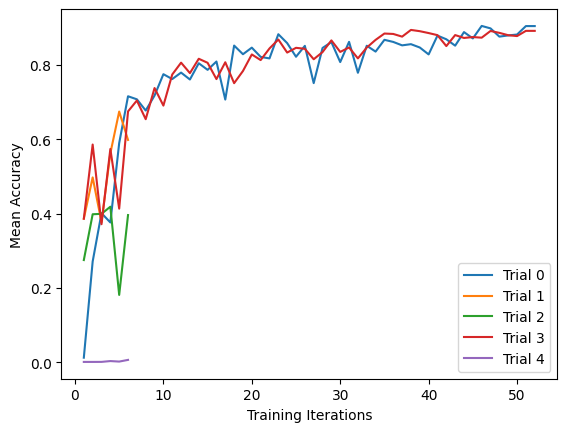

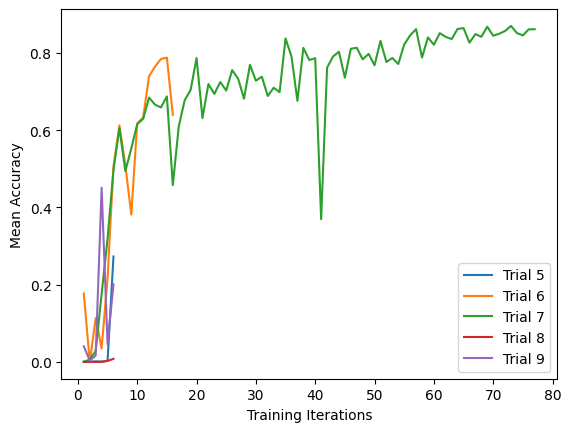

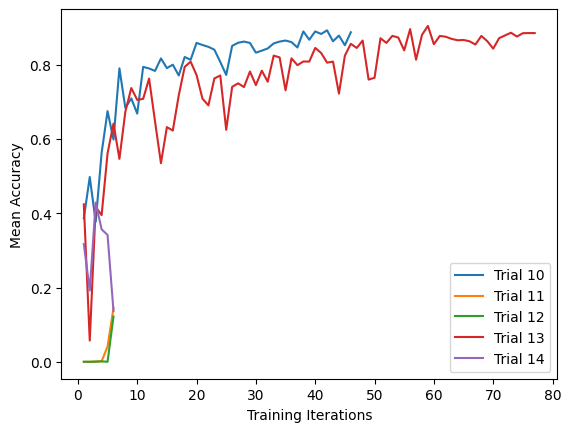

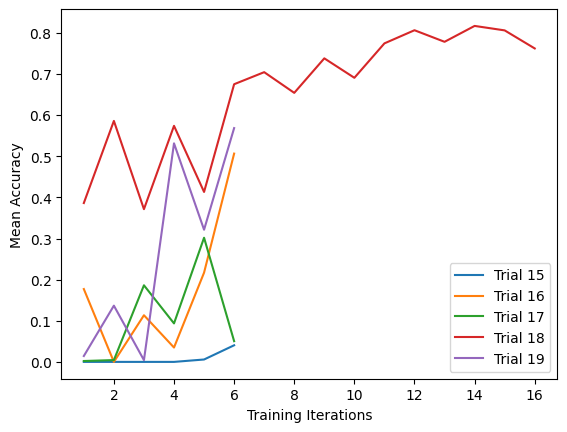

In [ ]:
num_labels = 20
num_graphs = 4

for i in range(num_graphs):
    plt.figure()
    for j in range(i * 5, (i + 1) * 5):
        plt.plot(result_grid[j].metrics_dataframe["training_iteration"], result_grid[j].metrics_dataframe["metrics/mAP50(B)"], label=f"Trial {j}")
    plt.xlabel('Training Iterations')
    plt.ylabel('Mean Accuracy')
    plt.legend()
    plt.show()





##XAI

In [12]:
! pip install YOLOv8-Explainer -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 15.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 kB 37.8 MB/s eta 0:00:00


In [17]:
import torch
from YOLOv8_Explainer import yolov8_heatmap, display_images
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# List of CAM methods to analyze
cam_methods = ["XGradCAM"]

# Model weights and image path
model_weight_path = "/content/drive/MyDrive/SeatBelt_project/Weights/Seat_Belt_weights_dwconv.pt"
image_path = "/content/drive/MyDrive/SeatBelt_project/DATA/testing/Car__011_88_best_win_rider.jpg"

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Target layers for heatmap generation
target_layers = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, -3]

# Dictionary to store heatmaps and analysis
all_heatmaps = {}

# Function to calculate focus distribution of a heatmap
def calculate_focus_distribution(heatmap, threshold=0.5):
    binary_map = (heatmap > threshold).astype(int)
    focus_ratio = np.sum(binary_map) / binary_map.size
    return focus_ratio

# Function to calculate attention overlap
def calculate_attention_overlap(heatmap, target_bbox):
    x_min, y_min, x_max, y_max = target_bbox
    roi_heatmap = heatmap[y_min:y_max, x_min:x_max]
    overlap_score = np.mean(roi_heatmap)
    return overlap_score

# Bounding box for the target object (mocked; replace with actual detection results)
target_bbox = (100, 50, 400, 300)  # Format: (x_min, y_min, x_max, y_max)

# Loop through each CAM method
for method in cam_methods:
    print(f"Generating heatmaps using {method}...")
    method_results = []

    for layer_idx in target_layers:
        print(f"Generating heatmap for Layer {layer_idx} using {method}...")

        # Generate heatmap
        model = yolov8_heatmap(
            weight=model_weight_path,
            conf_threshold=0.4,
            device=device,
            method=method,
            layer=[layer_idx],
            ratio=0.02,
            show_box=True,
            renormalize=False,
        )
        heatmap_images = model(img_path=image_path)

        # Convert heatmap to numpy for analysis
        # heatmap_array = heatmap_images[0][1]  # Extract heatmap (mocked)
        # Assuming heatmap_images is returned as a list of image objects
        # Convert the first heatmap image to a NumPy array for processing
        heatmap = heatmap_images[0]  # Extract the first heatmap
        if isinstance(heatmap, Image.Image):  # Check if it's a PIL image
            heatmap_array = np.array(heatmap)
        else:
            raise TypeError("Unexpected type for heatmap. Expected a PIL Image.")

        # Calculate focus distribution and attention overlap
        focus_ratio = calculate_focus_distribution(heatmap_array)
        attention_overlap = calculate_attention_overlap(heatmap_array, target_bbox)

        # Store analysis results
        method_results.append({
            "layer": layer_idx,
            "heatmap": heatmap_images,
            "focus_ratio": focus_ratio,
            "attention_overlap": attention_overlap,
        })

    all_heatmaps[method] = method_results

# Visualize analysis results
for method, results in all_heatmaps.items():
    print(f"Results for {method}:")
    for result in results:
        layer = result["layer"]
        focus_ratio = result["focus_ratio"]
        attention_overlap = result["attention_overlap"]

        print(f"Layer {layer}: Focus Ratio = {focus_ratio:.2f}, Attention Overlap = {attention_overlap:.2f}")
        print(f"Displaying heatmap for Layer {layer}...")
        display_images(result["heatmap"])

# Additional Visualization: Plot focus ratios and overlaps
for method, results in all_heatmaps.items():
    layers = [r["layer"] for r in results]
    focus_ratios = [r["focus_ratio"] for r in results]
    attention_overlaps = [r["attention_overlap"] for r in results]

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(layers, focus_ratios, marker="o", label="Focus Ratio")
    plt.title(f"Focus Distribution Analysis ({method})")
    plt.xlabel("Layer")
    plt.ylabel("Focus Ratio")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(layers, attention_overlaps, marker="o", color="orange", label="Attention Overlap")
    plt.title(f"Attention Overlap Analysis ({method})")
    plt.xlabel("Layer")
    plt.ylabel("Attention Overlap")
    plt.legend()

    plt.tight_layout()
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import torch
from YOLOv8_Explainer import yolov8_heatmap, display_images
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# List of CAM methods to analyze
cam_methods = ["XGradCAM"]  # You can add methods like "GradCAM", "ScoreCAM", etc.

# Model weights and image path
model_weight_path = "/content/drive/MyDrive/SeatBelt_project/Weights/Seat_Belt_weights_dwconv.pt"
image_path = "/content/drive/MyDrive/SeatBelt_project/DATA/testing/Car__020_88_best_win_rider.jpg"

# Perform inference using YOLO model
yolo_model = YOLO(model_weight_path)

print(yolo_model.model)

# Perform inference using the YOLO model
results = yolo_model(image_path)  # Replace 'yolo_model' with your YOLO model instance

# print(results)

# Extract detections from the results
detections = results[0].boxes  # YOLOv8 typically uses a 'boxes' attribute

# Convert detections to a NumPy array or process directly
formatted_detections = [
    (int(box.xyxy[0][0]), int(box.xyxy[0][1]), int(box.xyxy[0][2]), int(box.xyxy[0][3]), box.conf[0].item())
    for box in detections
]

# Apply the updated logic to choose the best bounding box
if formatted_detections:
    target_bbox = max(formatted_detections, key=lambda x: x[-1])  # Select the bounding box with the highest confidence
    print(f"Selected Target BBox: {target_bbox}")
else:
    raise ValueError("No detections found.")

# Device configuration: CUDA for performance, fallback to CPU if unavailable
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Specify layers for generating heatmaps
# Target layers are based on YOLOv8's architecture, which typically contains Conv2D layers at these indices
target_layers = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, -3]  # Validate indices match model architecture

# Dictionary to store all heatmaps and analysis results
all_heatmaps = {}

# Function to calculate focus distribution of a heatmap
def calculate_focus_distribution(heatmap, threshold=0.5):
    """
    Calculates the ratio of the heatmap with intensity values above a threshold.
    Args:
        heatmap: A 2D numpy array representing the heatmap.
        threshold: A float value for intensity thresholding.

    Returns:
        focus_ratio: Proportion of pixels above the threshold.
    """
    binary_map = (heatmap > threshold).astype(int)
    focus_ratio = np.sum(binary_map) / binary_map.size
    return focus_ratio

# Function to calculate attention overlap with a target bounding box
def calculate_attention_overlap(heatmap, target_bbox):
    """
    Measures the average activation of the heatmap within a specific bounding box.
    Args:
        heatmap: A 2D numpy array representing the heatmap.
        target_bbox: Bounding box coordinates (x_min, y_min, x_max, y_max).

    Returns:
        overlap_score: Mean intensity value within the bounding box.
    """
    x_min, y_min, x_max, y_max, _ = target_bbox
    roi_heatmap = heatmap[y_min:y_max, x_min:x_max]
    overlap_score = np.mean(roi_heatmap)
    return overlap_score

# Example bounding box for the target object (mocked; replace with actual detections)
# Format: (x_min, y_min, x_max, y_max)
# target_bbox = (100, 50, 400, 300)

# Loop through each CAM method for analysis
for method in cam_methods:
    print(f"Analyzing using {method}...")
    method_results = []  # List to store results for the current CAM method

    for layer_idx in target_layers:
        print(f"Generating heatmap for Layer {layer_idx} using {method}...")

        # Generate heatmap using YOLOv8_Explainer
        model = yolov8_heatmap(
            weight=model_weight_path,
            conf_threshold=0.2,  # Confidence threshold for detections
            device=device,
            method=method,
            layer=[layer_idx],  # Target specific layer
            ratio=0.02,  # Ratio for CAM visualization
            show_box=False,  # Overlay bounding boxes on heatmap
            renormalize=False,  # Normalize heatmap for consistency
        )

        # Get heatmap images (assuming first image is of interest)
        heatmap_images = model(img_path=image_path)

        # Convert heatmap to numpy for processing
        heatmap = heatmap_images[0]  # Use the first heatmap
        if isinstance(heatmap, Image.Image):  # Ensure it's a PIL image
            heatmap_array = np.array(heatmap) / 255.0  # Normalize to [0, 1]
        else:
            raise TypeError("Unexpected type for heatmap. Expected a PIL Image.")

        # Analyze the heatmap
        focus_ratio = calculate_focus_distribution(heatmap_array, threshold=0.5)
        attention_overlap = calculate_attention_overlap(heatmap_array, target_bbox)

        # Store results for this layer
        method_results.append({
            "layer": layer_idx,
            "heatmap": heatmap_images,
            "focus_ratio": focus_ratio,
            "attention_overlap": attention_overlap,
        })

    # Store results for the CAM method
    all_heatmaps[method] = method_results

# Visualization of Results
for method, results in all_heatmaps.items():
    print(f"\nResults for {method}:\n")
    layers = [r["layer"] for r in results]
    focus_ratios = [r["focus_ratio"] for r in results]
    attention_overlaps = [r["attention_overlap"] for r in results]

    for result in results:
        layer = result["layer"]
        focus_ratio = result["focus_ratio"]
        attention_overlap = result["attention_overlap"]

        print(f"Layer {layer}: Focus Ratio = {focus_ratio:.2f}, Attention Overlap = {attention_overlap:.2f}")

        # Display heatmap visually for qualitative analysis
        print(f"Displaying heatmap for Layer {layer}...")
        display_images(result["heatmap"])

    # Plot focus ratio and attention overlap for quantitative insights
    plt.figure(figsize=(12, 6))

    # Plot Focus Ratio
    plt.subplot(1, 2, 1)
    plt.bar(layers, focus_ratios, color='blue', alpha=0.7, label="Focus Ratio")
    plt.title(f"Focus Ratio Analysis ({method})")
    plt.xlabel("Layer Index")
    plt.ylabel("Focus Ratio")
    plt.xticks(layers)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend()

    # Plot Attention Overlap
    plt.subplot(1, 2, 2)
    plt.plot(layers, attention_overlaps, marker="o", color='orange', label="Attention Overlap")
    plt.title(f"Attention Overlap Analysis ({method})")
    plt.xlabel("Layer Index")
    plt.ylabel("Overlap Score")
    plt.xticks(layers)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend()

    plt.tight_layout()
    plt.show()

/content/drive/MyDrive/ultralytics/ultralytics/nn/tasks.py:732: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")



image 1/1 /content/drive/MyDrive/SeatBelt_project/DATA/testing/Car__020_88_best_win_rider.jpg: 640x640 2 Seat_Belts, 16.1ms
Speed: 3.2ms preprocess, 16.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Selected Target BBox: (69, 42, 138, 138, 0.5684277415275574)


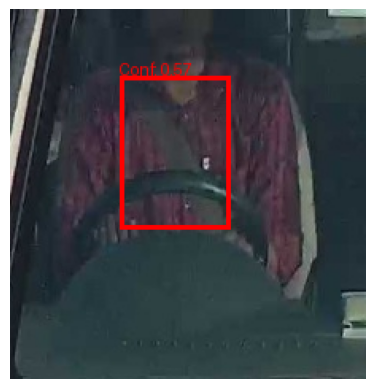

Using device: cuda
Analyzing using XGradCAM...
Generating heatmap for Layer 0 using XGradCAM...
customYOLOv8n summary: 225 layers, 1071427 parameters, 0 gradients


/usr/local/lib/python3.10/dist-packages/YOLOv8_Explainer/core.py:181: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(weight)


TypeError: 'Image' object is not subscriptable

In [37]:
import torch
from YOLOv8_Explainer import yolov8_heatmap, display_images
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw

# Map layer indices to module names (adjust as per your model summary)
target_layers = {
    0: "Conv", 1: "DWConv", 2: "C2f", 3: "DWConv", 4: "C2f",
    5: "DWConv", 6: "C2f", 7: "DWConv", 8: "C2f", 9: "SPPF",
    10: "Upsample", 11: "Concat", 12: "C2f", 13: "Upsample",
    14: "Concat", 15: "C2f", 16: "DWConv", 17: "Concat",
    18: "C2f", 19: "DWConv", 20: "Concat", 21: "C2f"
}

# Model weights and image path
model_weight_path = "/content/drive/MyDrive/SeatBelt_project/Weights/Seat_Belt_weights_dwconv.pt"
image_path = "/content/drive/MyDrive/SeatBelt_project/DATA/testing/Car__020_88_best_win_rider.jpg"

# Load YOLO model
yolo_model = YOLO(model_weight_path)

# Perform inference on the image using YOLO
results = yolo_model(image_path)

# Extract detections
detections = results[0].boxes

# Format detections: (xmin, ymin, xmax, ymax, confidence)
formatted_detections = [
    (int(box.xyxy[0][0]), int(box.xyxy[0][1]), int(box.xyxy[0][2]), int(box.xyxy[0][3]), box.conf[0].item())
    for box in detections
]

# Apply the logic to select the bounding box with the highest confidence
if formatted_detections:
    target_bbox = max(formatted_detections, key=lambda x: x[-1])  # Select the bounding box with highest confidence
    print(f"Selected Target BBox: {target_bbox}")
else:
    raise ValueError("No detections found.")

# Open the original image using PIL
image = Image.open(image_path)
draw = ImageDraw.Draw(image)

# Draw the selected bounding box on the image
xmin, ymin, xmax, ymax, confidence = target_bbox
draw.rectangle([xmin, ymin, xmax, ymax], outline="red", width=3)  # Red bounding box

# Optionally, add confidence score text
draw.text((xmin, ymin - 10), f"Conf: {confidence:.2f}", fill="red")

# Display the image with bounding box
plt.imshow(image)
plt.axis('off')  # Hide axis
plt.show()

# Device configuration: CUDA for performance, fallback to CPU if unavailable
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Specify layers for generating heatmaps (you can define these based on your model's architecture)
target_layers = list(target_layers.keys())  # Use all layer indices for analysis

# Dictionary to store all heatmaps and analysis results
all_heatmaps = {}

# # Function to calculate focus distribution of a heatmap
# def calculate_focus_distribution(heatmap, threshold=0.7):
#     binary_map = (heatmap > threshold).astype(int)
#     focus_ratio = np.sum(binary_map) / binary_map.size
#     return focus_ratio

# # Function to calculate attention overlap with a target bounding box
# def calculate_attention_overlap(heatmap, target_bbox):
#     x_min, y_min, x_max, y_max, _ = target_bbox
#     roi_heatmap = heatmap[y_min:y_max, x_min:x_max]
#     overlap_score = np.mean(roi_heatmap)
#     return overlap_score

def calculate_focus_distribution(heatmap, threshold=0.7):
    binary_map = (heatmap > threshold).astype(int)
    focus_ratio = np.sum(binary_map) / binary_map.size
    return focus_ratio, np.sum(binary_map), binary_map.size  # Optionally return the number of pixels exceeding the threshold


def calculate_attention_overlap(heatmap, target_bbox):
    x_min, y_min, x_max, y_max, _ = target_bbox
    roi_heatmap = heatmap[y_min:y_max, x_min:x_max]
    overlap_score = np.mean(roi_heatmap)
    bbox_area = (x_max - x_min) * (y_max - y_min)
    normalized_overlap = overlap_score / bbox_area  # Normalize by bounding box size
    return overlap_score, normalized_overlap


# Loop through each CAM method for analysis
cam_methods = ["XGradCAM"]  # You can extend this list with other CAM methods like "GradCAM", "ScoreCAM", etc.

for method in cam_methods:
    print(f"Analyzing using {method}...")
    method_results = []  # List to store results for the current CAM method

    # Iterate through all layers
    for layer_idx in target_layers:
        print(f"Generating heatmap for Layer {layer_idx} using {method}...")

        # Generate heatmap using YOLOv8_Explainer
        model = yolov8_heatmap(
            weight=model_weight_path,
            conf_threshold=0.2,
            device=device,
            method=method,
            layer=[layer_idx],  # Target specific layer
            ratio=0.02,
            show_box=True,
            renormalize=False,
        )

        # Get heatmap images (assuming first image is of interest)
        heatmap_images = model(img_path=image_path)

        # Convert heatmap to numpy for processing
        heatmap = heatmap_images[0]  # Use the first heatmap
        if isinstance(heatmap, Image.Image):
            heatmap_array = np.array(heatmap) / 255.0  # Normalize to [0, 1]
        else:
            raise TypeError("Unexpected type for heatmap. Expected a PIL Image.")

#         # Analyze the heatmap
#         focus_ratio = calculate_focus_distribution(heatmap_array, threshold=0.7)
#         attention_overlap = calculate_attention_overlap(heatmap_array, target_bbox)

#         # Store results for this layer
#         method_results.append({
#             "layer": layer_idx,
#             "heatmap": heatmap_images,
#             "focus_ratio": focus_ratio,
#             "attention_overlap": attention_overlap,
#         })

#     # Store results for the CAM method
#     all_heatmaps[method] = method_results

# # Visualization of Results
# for method, results in all_heatmaps.items():
#     print(f"\nResults for {method}:\n")
#     layers = [r["layer"] for r in results]
#     focus_ratios = [r["focus_ratio"] for r in results]
#     attention_overlaps = [r["attention_overlap"] for r in results]

#     for result in results:
#         layer = result["layer"]
#         focus_ratio = result["focus_ratio"]
#         attention_overlap = result["attention_overlap"]

#         print(f"Layer {layer}: Focus Ratio = {focus_ratio:.2f}, Attention Overlap = {attention_overlap:.2f}")

#         # Display heatmap visually for qualitative analysis
#         print(f"Displaying heatmap for Layer {layer}...")
#         display_images(result["heatmap"])

#     # Plot focus ratio and attention overlap for quantitative insights
#     plt.figure(figsize=(12, 6))

#     # Plot Focus Ratio
#     plt.subplot(1, 2, 1)
#     plt.bar(layers, focus_ratios, color='blue', alpha=0.7, label="Focus Ratio")
#     plt.title(f"Focus Ratio Analysis ({method})")
#     plt.xlabel("Layer Index")
#     plt.ylabel("Focus Ratio")
#     plt.xticks(layers)
#     plt.grid(True, linestyle="--", alpha=0.5)
#     plt.legend()

#     # Plot Attention Overlap
#     plt.subplot(1, 2, 2)
#     plt.plot(layers, attention_overlaps, marker="o", color='orange', label="Attention Overlap")
#     plt.title(f"Attention Overlap Analysis ({method})")
#     plt.xlabel("Layer Index")
#     plt.ylabel("Overlap Score")
#     plt.xticks(layers)
#     plt.grid(True, linestyle="--", alpha=0.5)
#     plt.legend()

#     plt.tight_layout()
#     plt.show()


        # Analyze heatmap
        focus_ratio, focus_pixels, total_pixels = calculate_focus_distribution(heatmap_array, threshold=0.7)
        attention_overlap, normalized_overlap = calculate_attention_overlap(heatmap, target_bbox)

        # Store results for this layer
        method_results.append({
            "layer": layer_idx,
            "heatmap": heatmap_images,
            "focus_ratio": focus_ratio,
            "focus_pixels": focus_pixels,
            "total_pixels": total_pixels,
            "attention_overlap": attention_overlap,
            "normalized_overlap": normalized_overlap,
        })

    # Store results for the CAM method
    all_heatmaps[method] = method_results

# Visualization of Results for all methods
for method, results in all_heatmaps.items():
    print(f"\nResults for {method}:\n")
    layers = [r["layer"] for r in results]
    focus_ratios = [r["focus_ratio"] for r in results]
    attention_overlaps = [r["attention_overlap"] for r in results]

    # Display results and heatmaps for each layer
    for result in results:
        layer = result["layer"]
        focus_ratio = result["focus_ratio"]
        attention_overlap = result["attention_overlap"]
        print(f"Layer {layer}: Focus Ratio = {focus_ratio:.2f}, Attention Overlap = {attention_overlap:.2f}")
        display_images(result["heatmap"])

    # Plot focus ratio and attention overlap
    plt.figure(figsize=(12, 6))

    # Plot Focus Ratio
    plt.subplot(1, 2, 1)
    plt.bar(layers, focus_ratios, color='blue', alpha=0.7, label="Focus Ratio")
    plt.title(f"Focus Ratio Analysis ({method})")
    plt.xlabel("Layer Index")
    plt.ylabel("Focus Ratio")
    plt.xticks(layers)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend()

    # Plot Attention Overlap
    plt.subplot(1, 2, 2)
    plt.plot(layers, attention_overlaps, marker="o", color='orange', label="Attention Overlap")
    plt.title(f"Attention Overlap Analysis ({method})")
    plt.xlabel("Layer Index")
    plt.ylabel("Overlap Score")
    plt.xticks(layers)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
import torch
import os
from YOLOv8_Explainer import yolov8_heatmap, display_images
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw

# Map layer indices to module names (adjust as per your model summary)
target_layers = {
    0: "Conv", 1: "DWConv", 2: "C2f", 3: "DWConv", 4: "C2f",
    5: "DWConv", 6: "C2f", 7: "DWConv", 8: "C2f", 9: "SPPF",
    10: "Upsample", 11: "Concat", 12: "C2f", 13: "Upsample",
    14: "Concat", 15: "C2f", 16: "DWConv", 17: "Concat",
    18: "C2f", 19: "DWConv", 20: "Concat", 21: "C2f"
}

# Model weights and folder path for images
model_weight_path = "/content/drive/MyDrive/SeatBelt_project/Weights/Seat_Belt_weights_dwconv.pt"
image_folder_path = "/content/drive/MyDrive/SeatBelt_project/DATA/testing/"

# Load YOLO model
yolo_model = YOLO(model_weight_path)

# Device configuration: CUDA for performance, fallback to CPU if unavailable
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Specify layers for generating heatmaps (you can define these based on your model's architecture)
target_layers = list(target_layers.keys())  # Use all layer indices for analysis

# Dictionary to store all heatmaps and analysis results
all_heatmaps = {}

# # Function to calculate focus distribution of a heatmap
# def calculate_focus_distribution(heatmap, threshold=0.7):
#     binary_map = (heatmap > threshold).astype(int)
#     focus_ratio = np.sum(binary_map) / binary_map.size
#     return focus_ratio

# # Function to calculate attention overlap with a target bounding box
# def calculate_attention_overlap(heatmap, target_bbox):
#     x_min, y_min, x_max, y_max, _ = target_bbox
#     roi_heatmap = heatmap[y_min:y_max, x_min:x_max]
#     overlap_score = np.mean(roi_heatmap)
#     return overlap_score

# Function to process each image in the folder
def process_image(image_path):
    # Perform inference on the image using YOLO
    results = yolo_model(image_path)

    # Extract detections
    detections = results[0].boxes

    # Format detections: (xmin, ymin, xmax, ymax, confidence)
    formatted_detections = [
        (int(box.xyxy[0][0]), int(box.xyxy[0][1]), int(box.xyxy[0][2]), int(box.xyxy[0][3]), box.conf[0].item())
        for box in detections
    ]

    # Apply the logic to select the bounding box with the highest confidence
    if formatted_detections:
        target_bbox = max(formatted_detections, key=lambda x: x[-1])  # Select the bounding box with highest confidence
        print(f"Selected Target BBox: {target_bbox}")
    else:
        raise ValueError("No detections found.")

    # Open the original image using PIL
    image = Image.open(image_path)
    draw = ImageDraw.Draw(image)

    # Draw the selected bounding box on the image
    xmin, ymin, xmax, ymax, confidence = target_bbox
    draw.rectangle([xmin, ymin, xmax, ymax], outline="red", width=3)  # Red bounding box

    # Optionally, add confidence score text
    draw.text((xmin, ymin - 10), f"Conf: {confidence:.2f}", fill="red")

    # Display the image with bounding box
    plt.imshow(image)
    plt.axis('off')  # Hide axis
    plt.show()

    return target_bbox, image_path  # Return target bounding box and image path for heatmap processing

# Loop through all images in the folder
for image_filename in os.listdir(image_folder_path):
    image_path = os.path.join(image_folder_path, image_filename)
    if image_path.lower().endswith(('.png', '.jpg', '.jpeg')):  # Process only image files
        print(f"\nProcessing image: {image_path}")

        # Process image and get the target bbox
        target_bbox, image_path = process_image(image_path)

        # Dictionary to store results for the current image
        method_results = []

        # Loop through each CAM method for analysis
        cam_methods = ["XGradCAM"]  # You can extend this list with other CAM methods like "GradCAM", "ScoreCAM", etc.

        for method in cam_methods:
            print(f"Analyzing using {method} for image {image_path}...")

            # Iterate through all layers
            for layer_idx in target_layers:
                print(f"Generating heatmap for Layer {layer_idx} using {method}...")

                # Generate heatmap using YOLOv8_Explainer
                model = yolov8_heatmap(
                    weight=model_weight_path,
                    conf_threshold=0.2,
                    device=device,
                    method=method,
                    layer=[layer_idx],  # Target specific layer
                    ratio=0.02,
                    show_box=True,
                    renormalize=False,
                )

                # Get heatmap images (assuming first image is of interest)
                heatmap_images = model(img_path=image_path)

                # Convert heatmap to numpy for processing
                heatmap = heatmap_images[0]  # Use the first heatmap
                if isinstance(heatmap, Image.Image):
                    heatmap_array = np.array(heatmap) / 255.0  # Normalize to [0, 1]
                else:
                    raise TypeError("Unexpected type for heatmap. Expected a PIL Image.")

                # Analyze the heatmap
                focus_ratio = calculate_focus_distribution(heatmap_array, threshold=0.7)
                attention_overlap = calculate_attention_overlap(heatmap_array, target_bbox)

                # Store results for this layer
                method_results.append({
                    "layer": layer_idx,
                    "heatmap": heatmap_images,
                    "focus_ratio": focus_ratio,
                    "attention_overlap": attention_overlap,
                })

        # Store results for the current image
        all_heatmaps[image_filename] = method_results

# Visualization of Results for all images
for image_filename, results in all_heatmaps.items():
    print(f"\nResults for image: {image_filename}")

    for result in results:
        layer = result["layer"]
        focus_ratio = result["focus_ratio"]
        attention_overlap = result["attention_overlap"]
        print(f"Layer {layer}: Focus Ratio = {focus_ratio:.2f}, Attention Overlap = {attention_overlap:.2f}")

        # Display heatmap visually for qualitative analysis
        print(f"Displaying heatmap for Layer {layer}...")
        display_images(result["heatmap"])

    # Plot focus ratio and attention overlap for quantitative insights
    plt.figure(figsize=(12, 6))

    # Plot Focus Ratio
    plt.subplot(1, 2, 1)
    plt.bar([r["layer"] for r in results], [r["focus_ratio"] for r in results], color='blue', alpha=0.7, label="Focus Ratio")
    plt.title(f"Focus Ratio Analysis for {image_filename}")
    plt.xlabel("Layer Index")
    plt.ylabel("Focus Ratio")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend()

    # Plot Attention Overlap
    plt.subplot(1, 2, 2)
    plt.plot([r["layer"] for r in results], [r["attention_overlap"] for r in results], marker="o", color='orange', label="Attention Overlap")
    plt.title(f"Attention Overlap Analysis for {image_filename}")
    plt.xlabel("Layer Index")
    plt.ylabel("Overlap Score")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend()

    plt.tight_layout()
    plt.show()

In [33]:
# import torch
# from YOLOv8_Explainer import yolov8_heatmap, display_images
# import matplotlib.pyplot as plt
# import numpy as np
# from PIL import Image
# import cv2

# # Map layer indices to module names (adjust as per your model summary)
# target_layers = {
#     0: "Conv", 1: "DWConv", 2: "C2f", 3: "DWConv", 4: "C2f",
#     5: "DWConv", 6: "C2f", 7: "DWConv", 8: "C2f", 9: "SPPF",
#     10: "Upsample", 11: "Concat", 12: "C2f", 13: "Upsample",
#     14: "Concat", 15: "C2f", 16: "DWConv", 17: "Concat",
#     18: "C2f", 19: "DWConv", 20: "Concat", 21: "C2f"
# }

# # Model weights and image path
# model_weight_path = "/content/drive/MyDrive/SeatBelt_project/Weights/Seat_Belt_weights_dwconv.pt"
# image_path = "/content/drive/MyDrive/SeatBelt_project/DATA/testing/Car__020_88_best_win_rider.jpg"

# # Load YOLO model
# yolo_model = YOLO(model_weight_path)

# # Perform inference on the image using YOLO
# results = yolo_model(image_path)

# # Extract detections
# detections = results[0].boxes

# # Format detections: (xmin, ymin, xmax, ymax, confidence)
# formatted_detections = [
#     (int(box.xyxy[0][0]), int(box.xyxy[0][1]), int(box.xyxy[0][2]), int(box.xyxy[0][3]), box.conf[0].item())
#     for box in detections
# ]

# # Apply the logic to select the bounding box with the highest confidence
# if formatted_detections:
#     target_bbox = max(formatted_detections, key=lambda x: x[-1])  # Select the bounding box with highest confidence
#     print(f"Selected Target BBox: {target_bbox}")
# else:
#     raise ValueError("No detections found.")

# # Open the original image using PIL
# image = Image.open(image_path)
# draw = ImageDraw.Draw(image)

# # Draw the selected bounding box on the image
# xmin, ymin, xmax, ymax, confidence = target_bbox
# draw.rectangle([xmin, ymin, xmax, ymax], outline="red", width=3)  # Red bounding box

# # Optionally, add confidence score text
# draw.text((xmin, ymin - 10), f"Conf: {confidence:.2f}", fill="red")

# # Display the image with bounding box
# plt.imshow(image)
# plt.axis('off')  # Hide axis
# plt.show()

# # Device configuration: CUDA for performance, fallback to CPU if unavailable
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print(f"Using device: {device}")

# # Specify layers for generating heatmaps (you can define these based on your model's architecture)
# target_layers = list(target_layers.keys())  # Use all layer indices for analysis

# # Dictionary to store all heatmaps and analysis results
# all_heatmaps = {}

# # Function to calculate focus distribution of a heatmap
# def calculate_focus_distribution(heatmap, threshold=0.7):
#     binary_map = (heatmap > threshold).astype(int)
#     focus_ratio = np.sum(binary_map) / binary_map.size
#     return focus_ratio

# # Function to calculate attention overlap with a target bounding box
# def calculate_attention_overlap(heatmap, target_bbox):
#     x_min, y_min, x_max, y_max, _ = target_bbox
#     roi_heatmap = heatmap[y_min:y_max, x_min:x_max]
#     overlap_score = np.mean(roi_heatmap)
#     return overlap_score

# # Overlay heatmap on the original image
# def overlay_heatmap_on_image(image_path, heatmap):
#     img = Image.open(image_path)
#     img = np.array(img)
#     heatmap_rescaled = np.uint8(255 * heatmap)  # Rescale heatmap to 255
#     heatmap_rescaled = cv2.resize(heatmap_rescaled, (img.shape[1], img.shape[0]))

#     # Normalize heatmap to be in the same range as the image
#     heatmap = np.expand_dims(heatmap_rescaled, axis=-1)
#     superimposed_img = img * 0.5 + heatmap * 0.5  # Adjust alpha for visibility

#     plt.imshow(superimposed_img)
#     plt.title("Overlayed Heatmap on Image")
#     plt.show()

# # Function to plot CAM for different layers
# def plot_cams_for_layers(all_results):
#     for method, results in all_results.items():
#         for result in results:
#             layer = result['layer']
#             heatmap = result['heatmap'][0]  # Assuming the first heatmap is relevant
#             plt.imshow(heatmap, cmap='jet', alpha=0.6)
#             plt.colorbar()
#             plt.title(f"{method} - CAM for Layer {layer}")
#             plt.show()

# # Function to plot scatter of Focus vs Attention Overlap
# def plot_focus_vs_overlap(layers, focus_ratios, attention_overlaps):
#     plt.figure(figsize=(8, 6))
#     plt.scatter(focus_ratios, attention_overlaps, color='red')
#     plt.title("Focus Ratio vs Attention Overlap")
#     plt.xlabel("Focus Ratio")
#     plt.ylabel("Attention Overlap")
#     for i, layer in enumerate(layers):
#         plt.annotate(str(layer), (focus_ratios[i], attention_overlaps[i]), fontsize=9, color='blue')
#     plt.grid(True)
#     plt.show()

# # Function to plot activation histogram for each layer
# def plot_activation_histogram(activation_maps):
#     for idx, activation in enumerate(activation_maps):
#         activations = activation.flatten()
#         plt.hist(activations, bins=50, alpha=0.7, label=f"Layer {idx}")

#     plt.title("Activation Distribution per Layer")
#     plt.xlabel("Activation Value")
#     plt.ylabel("Frequency")
#     plt.legend()
#     plt.grid(True)
#     plt.show()

# # Function to plot focused regions
# def plot_focused_regions(heatmap, threshold=0.7):
#     focused_region = (heatmap > threshold).astype(int)
#     plt.imshow(focused_region, cmap='hot', alpha=0.7)
#     plt.title("Focused Regions (Above Threshold)")
#     plt.show()

# # Function to aggregate heatmaps
# def aggregate_attention_maps(all_results):
#     combined_attention = np.zeros_like(all_results[0]['heatmap'][0])

#     for result in all_results['XGradCAM']:  # Specify the CAM method
#         combined_attention += result['heatmap'][0]

#     # Normalize to [0, 1] for visualization
#     combined_attention /= len(all_results['XGradCAM'])
#     plt.imshow(combined_attention, cmap='hot', alpha=0.7)
#     plt.colorbar()
#     plt.title("Aggregated Attention Across Layers")
#     plt.show()

# # Loop through each CAM method for analysis
# cam_methods = ["XGradCAM"]  # You can extend this list with other CAM methods like "GradCAM", "ScoreCAM", etc.

# for method in cam_methods:
#     print(f"Analyzing using {method}...")
#     method_results = []  # List to store results for the current CAM method

#     # Iterate through all layers
#     for layer_idx in target_layers:
#         print(f"Generating heatmap for Layer {layer_idx} using {method}...")

#         # Generate heatmap using YOLOv8_Explainer
#         model = yolov8_heatmap(
#             weight=model_weight_path,
#             conf_threshold=0.2,
#             device=device,
#             method=method,
#             layer=[layer_idx],  # Target specific layer
#             ratio=0.02,
#             show_box=False,
#             renormalize=False,
#         )

#         # Get heatmap images (assuming first image is of interest)
#         heatmap_images = model(img_path=image_path)

#         # Convert heatmap to numpy for processing
#         heatmap = heatmap_images[0]  # Use the first heatmap
#         if isinstance(heatmap, Image.Image):
#             heatmap_array = np.array(heatmap) / 255.0  # Normalize to [0, 1]
#         else:
#             raise TypeError("Unexpected type for heatmap. Expected a PIL Image.")

#         # Analyze the heatmap
#         focus_ratio = calculate_focus_distribution(heatmap_array, threshold=0.5)
#         attention_overlap = calculate_attention_overlap(heatmap_array, target_bbox)

#         # Store results for this layer
#         method_results.append({
#             "layer": layer_idx,
#             "heatmap": heatmap_images,
#             "focus_ratio": focus_ratio,
#             "attention_overlap": attention_overlap,
#         })

#     # Store results for the CAM method
#     all_heatmaps[method] = method_results

# # Visualization of Results
# for method, results in all_heatmaps.items():
#     print(f"\nResults for {method}:\n")
#     layers = [r["layer"] for r in results]
#     focus_ratios = [r["focus_ratio"] for r in results]
#     attention_overlaps = [r["attention_overlap"] for r in results]

#     for result in results:
#         layer = result["layer"]
#         focus_ratio = result["focus_ratio"]
#         attention_overlap = result["attention_overlap"]

#         print(f"Layer {layer}: Focus Ratio = {focus_ratio:.2f}, Attention Overlap = {attention_overlap:.2f}")

#         # Display heatmap visually for qualitative analysis
#         print(f"Displaying heatmap for Layer {layer}...")
#         display_images(result["heatmap"])

#     # Plot focus ratio and attention overlap for quantitative insights
#     plt.figure(figsize=(12, 6))

#     # Plot Focus Ratio
#     plt.subplot(1, 2, 1)
#     plt.bar(layers, focus_ratios, color='blue', alpha=0.7, label="Focus Ratio")
#     plt.title(f"Focus Ratio Analysis ({method})")

Output hidden; open in https://colab.research.google.com to view.

###SHAPELY implementation

In [ ]:
# !pip install shap

/content/drive/MyDrive/ultralytics/ultralytics/nn/tasks.py:732: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")



0: 640x640 2 Seat_Belts, 10.3ms
Speed: 3.1ms preprocess, 10.3ms inference, 824.1ms postprocess per image at shape (1, 3, 640, 640)
Prediction Results: [ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'Seat_Belt'}
obb: None
orig_img: array([[[32, 31, 36],
        [32, 31, 36],
        [34, 33, 38],
        ...,
        [73, 62, 60],
        [73, 62, 60],
        [73, 62, 60]],

       [[32, 31, 36],
        [32, 31, 36],
        [34, 33, 38],
        ...,
        [73, 62, 60],
        [73, 62, 60],
        [73, 62, 60]],

       [[33, 32, 37],
        [33, 32, 37],
        [34, 33, 38],
        ...,
        [69, 58, 57],
        [69, 58, 57],
        [69, 58, 57]],

       ...,

       [[30, 33, 40],
        [30, 33, 40],
        [30, 33, 40],
        ...,
        [53, 60, 66],
        [53, 60, 66],
        [53, 60, 66]],

       [[30, 33, 40],
        [30, 33, 40],
        [30, 33, 40],
 

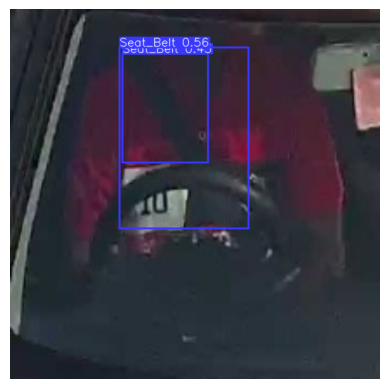

In [ ]:
import torch
from ultralytics import YOLO
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

# Load the YOLO model with depthwise convolution layers
model_path = "/content/drive/MyDrive/SeatBelt_project/Weights/Seat_Belt_weights_dwconv.pt"
model = YOLO(model_path)  # Load model

# Define transformation to resize and convert the sample image to tensor
preprocess = transforms.Compose([
    transforms.Resize((640, 640)),  # Resize to the model's input size
    transforms.ToTensor()
])

# Load and preprocess the sample image
sample_image_path = '/content/drive/MyDrive/SeatBelt_project/DATA/testing/Car__006_85_best_win_rider.jpg'
sample_image = Image.open(sample_image_path).convert("RGB")
preprocessed_image = preprocess(sample_image).unsqueeze(0)  # Add batch dimension

# Perform inference on the preprocessed image
results = model.predict(source=preprocessed_image, save=False)  # Perform prediction

# Display prediction results
print("Prediction Results:", results)

# Optionally, visualize the detection on the image
# Assuming results[0].plot() exists in the output format for visualization in YOLO
plt.imshow(results[0].plot())  # Plot with bounding boxes
plt.axis("off")
plt.show()

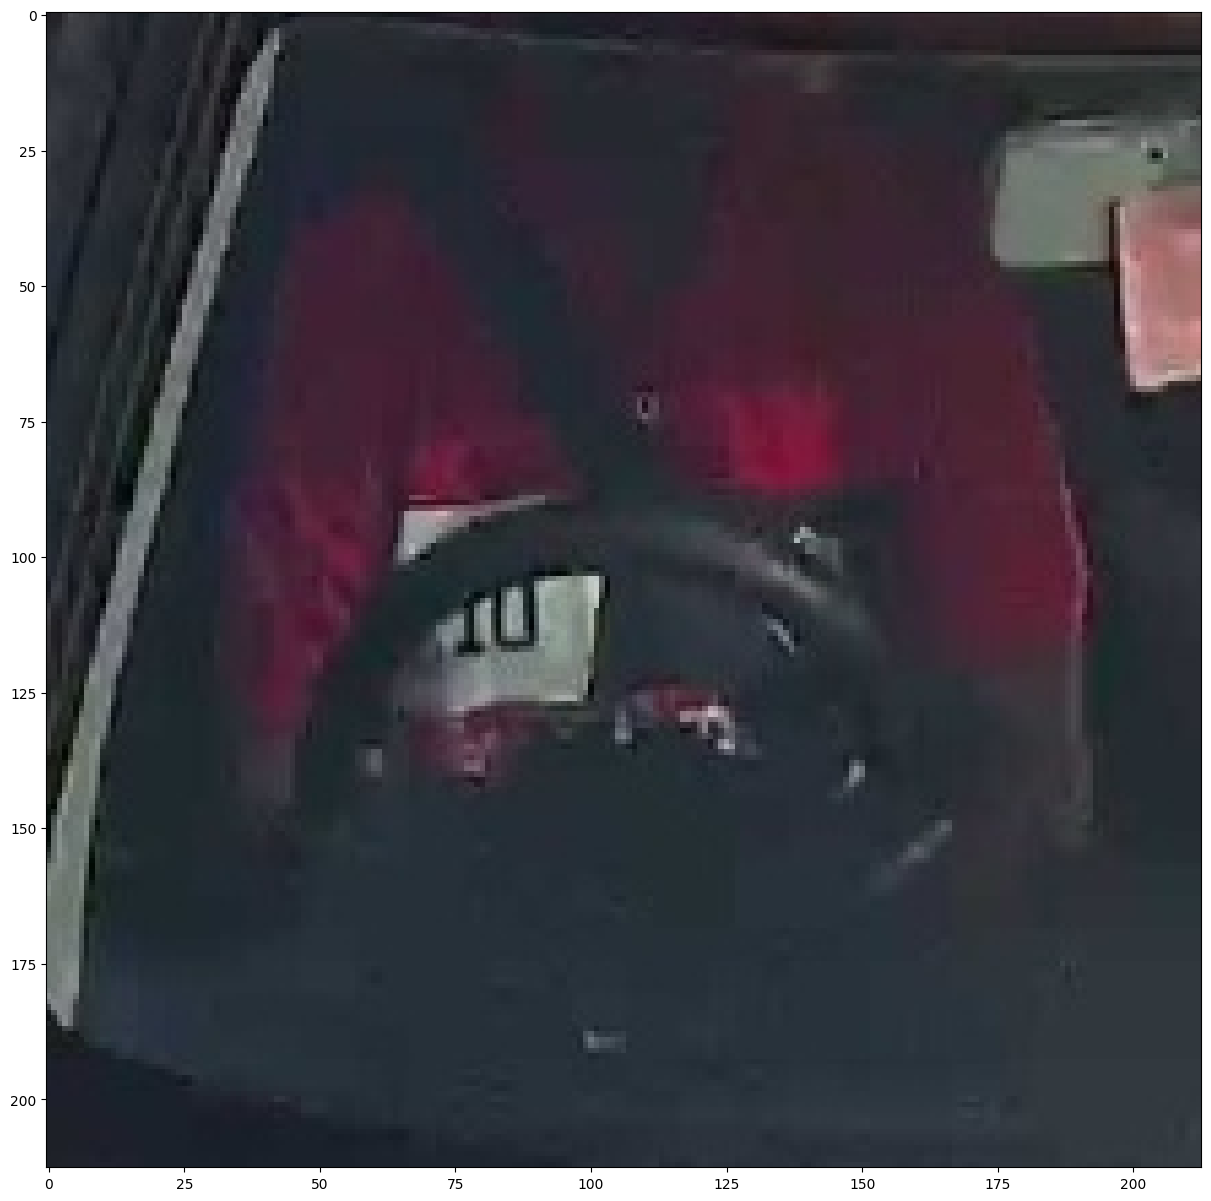

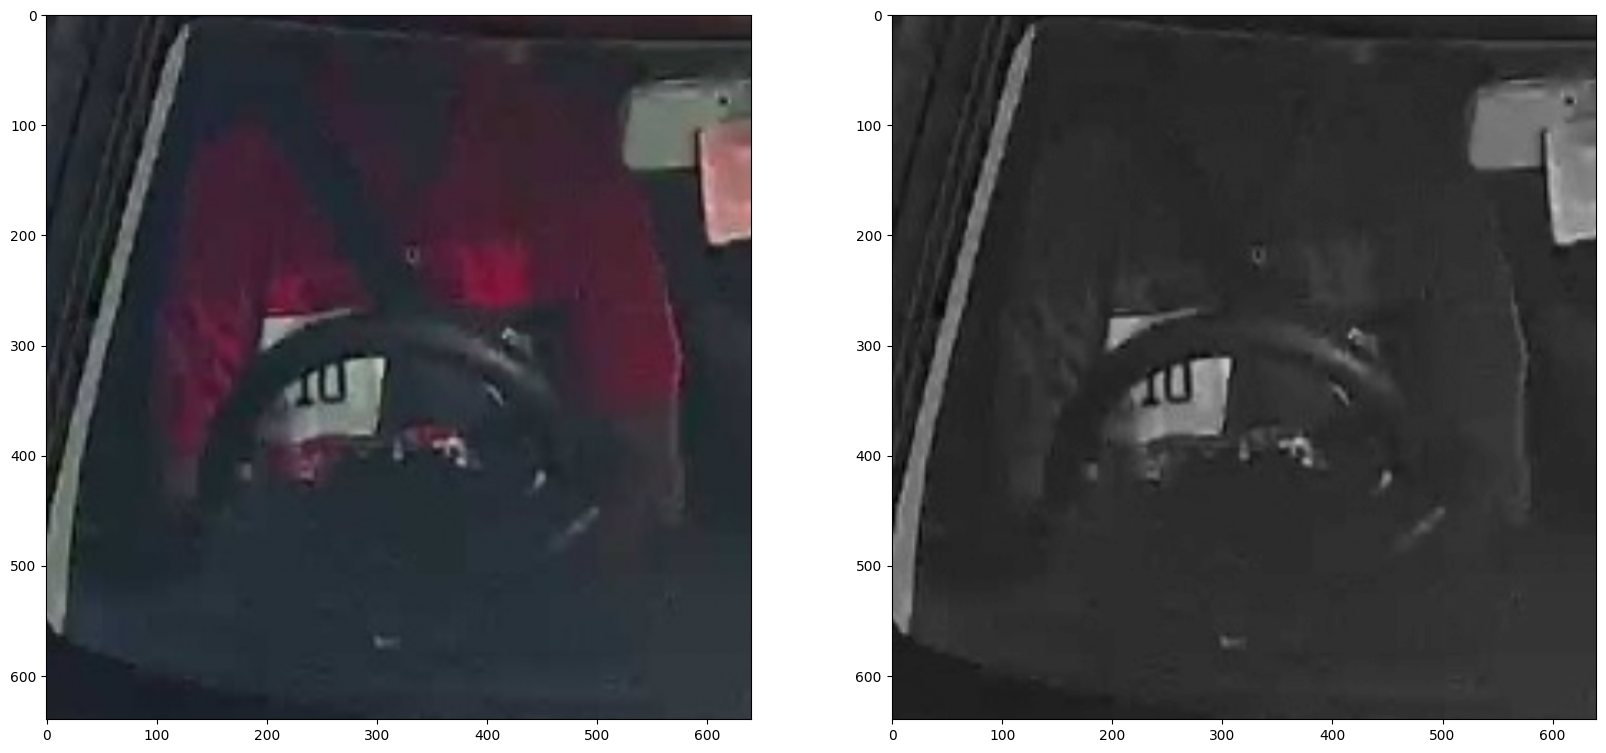


0: 640x640 2 Seat_Belts, 9.5ms
Speed: 0.1ms preprocess, 9.5ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)


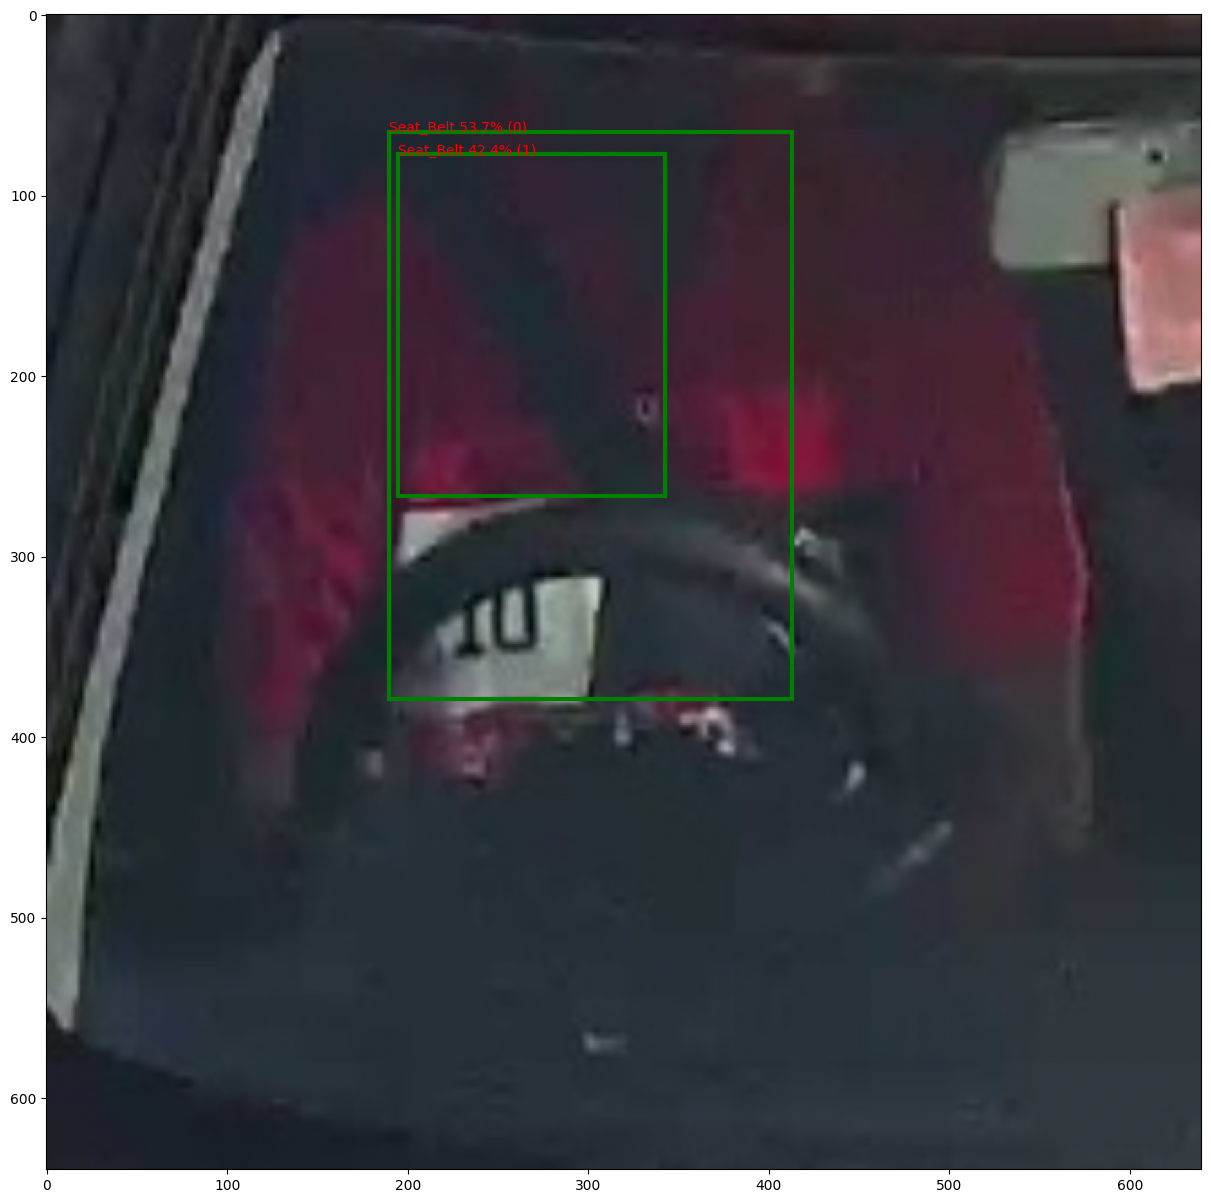


0: 640x640 (no detections), 10.3ms
Speed: 0.2ms preprocess, 10.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


<ipython-input-16-0ae8cbf3892c>:90: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.target = torch.tensor(target, device=device)


Provided model function fails when applied to the provided data set.


AttributeError: 'Results' object has no attribute 'shape'. See valid attributes below.

    A class for storing and manipulating inference results.

    Attributes:
        orig_img (numpy.ndarray): Original image as a numpy array.
        orig_shape (tuple): Original image shape in (height, width) format.
        boxes (Boxes, optional): Object containing detection bounding boxes.
        masks (Masks, optional): Object containing detection masks.
        probs (Probs, optional): Object containing class probabilities for classification tasks.
        keypoints (Keypoints, optional): Object containing detected keypoints for each object.
        speed (dict): Dictionary of preprocess, inference, and postprocess speeds (ms/image).
        names (dict): Dictionary of class names.
        path (str): Path to the image file.

    Methods:
        update(boxes=None, masks=None, probs=None, obb=None): Updates object attributes with new detection results.
        cpu(): Returns a copy of the Results object with all tensors on CPU memory.
        numpy(): Returns a copy of the Results object with all tensors as numpy arrays.
        cuda(): Returns a copy of the Results object with all tensors on GPU memory.
        to(*args, **kwargs): Returns a copy of the Results object with tensors on a specified device and dtype.
        new(): Returns a new Results object with the same image, path, and names.
        plot(...): Plots detection results on an input image, returning an annotated image.
        show(): Show annotated results to screen.
        save(filename): Save annotated results to file.
        verbose(): Returns a log string for each task, detailing detections and classifications.
        save_txt(txt_file, save_conf=False): Saves detection results to a text file.
        save_crop(save_dir, file_name=Path("im.jpg")): Saves cropped detection images.
        tojson(normalize=False): Converts detection results to JSON format.
    

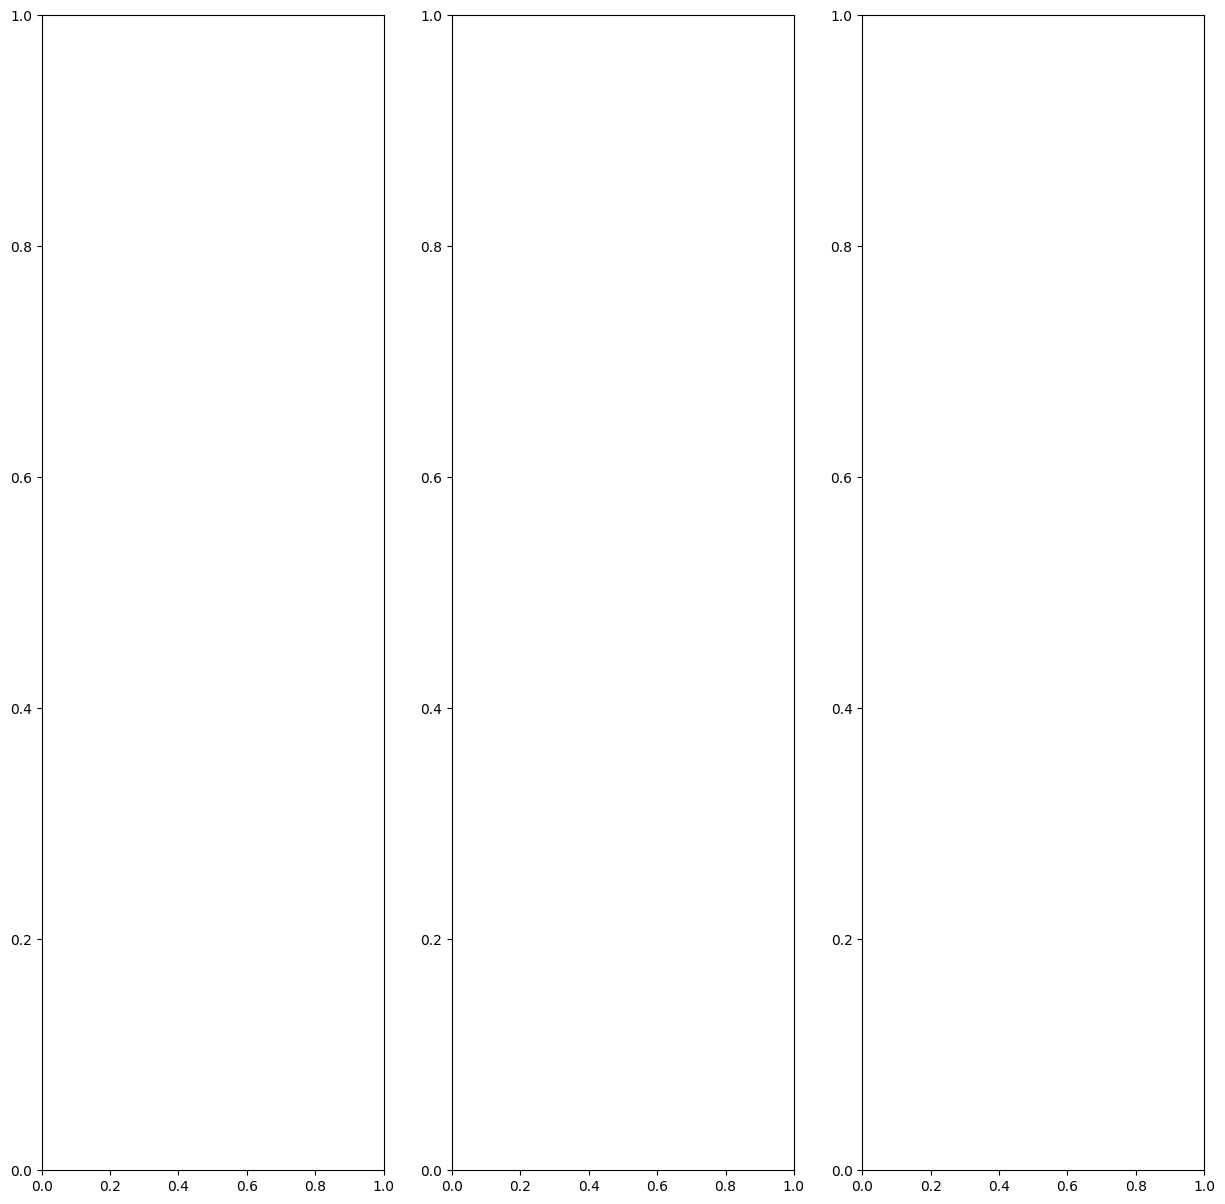

In [ ]:
# Install required libraries
# !pip install -q ultralytics shap

# from google.colab import drive
import random
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import shap
import cv2
from ultralytics import YOLO  # Import YOLOv8


# Load the YOLOv8 model
model_path = "/content/drive/MyDrive/SeatBelt_project/Weights/Seat_Belt_weights_dwconv.pt"
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = YOLO(model_path)  # Load the model

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

def image_processing(path, img_size, show_image_processing=0):
    img_org = cv2.imread(path, cv2.IMREAD_COLOR)
    img_org = cv2.cvtColor(img_org, cv2.COLOR_BGR2RGB)
    old_img_size = img_org.shape[:2]  # (height, width)

    ratio = float(img_size) / max(old_img_size)
    new_size_y, new_size_x = tuple([int(x * ratio) for x in old_img_size])
    img = cv2.resize(img_org, (new_size_x, new_size_y))

    delta_w = img_size - new_size_x
    delta_h = img_size - new_size_y
    top, bottom = delta_h // 2, delta_h - (delta_h // 2)
    left, right = delta_w // 2, delta_w - (delta_w // 2)

    color = [0, 0, 0]  # Padding color
    img = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)
    img = img.astype("float64") / 255
    img_gray = rgb2gray(img)

    if show_image_processing:
        plt.figure(figsize=(15, 15))
        plt.imshow(img_org)
        plt.show()
        plt.figure(figsize=(20, 20))
        plt.subplot(1, 2, 1)
        plt.imshow(img)
        plt.subplot(1, 2, 2)
        plt.imshow(img_gray, cmap='gray', vmin=0, vmax=1)
        plt.show()

    return img_org, img, img_gray

def model_processing(img, confidence, iou, show_yolo_result=0):
    torch_image = torch.from_numpy(np.ascontiguousarray(img.transpose(2, 0, 1))).to(device).unsqueeze(0)
    results = model(torch_image)  # Get predictions

    output = results[0].boxes.data  # Access the bounding boxes from the Results object

    if show_yolo_result:
        fig = plt.figure(figsize=(15, 15))
        ax = fig.add_subplot(1, 1, 1)
        plt.imshow(img)
        for i, detection in enumerate(output.cpu().numpy()):
            label = f"{model.names[int(detection[5])]} {detection[4]:0.1%} ({i})"
            bbox = patches.Rectangle(detection[:2], detection[2]-detection[0], detection[3]-detection[1], linewidth=3, edgecolor='g', facecolor='none')
            plt.text(detection[0], detection[1], label, color="red")
            ax.add_patch(bbox)
        plt.show()

    return output, results  # Return the output and the Results object

class CastNumpy(torch.nn.Module):
    def __init__(self):
        super(CastNumpy, self).__init__()

    def forward(self, image):
        image = np.ascontiguousarray(image)
        image = torch.from_numpy(image).to(device)
        if image.ndimension() == 3:
            image = image.unsqueeze(0)
        return image

class OD2Score(torch.nn.Module):
    def __init__(self, target, conf_thresh=0.01, iou_thresh=0.5):
        super(OD2Score, self).__init__()
        self.conf_thresh = conf_thresh
        self.iou_thresh = iou_thresh
        self.target = torch.tensor(target, device=device)

    def forward(self, x):
        score_best_box = torch.zeros([x[0].shape[0]], device=device)

        for idx, img in enumerate(x[0]):
            img = img.unsqueeze(0)
            output = model(img)  # Get the prediction from YOLO
            output = output[0].boxes.data

            if output.size(0):
                correct_class_predictions = output[:, 5] == self.target[5]
                correctly_labeled_boxes = output[correct_class_predictions]

                if correctly_labeled_boxes.shape[0]:
                    iou_with_target, _idx = box_iou(correctly_labeled_boxes[:, :4], self.target.unsqueeze(0)[:, :4]).max(1)
                    index_best_box_in_correct_class = torch.argmax(iou_with_target)
                    index_best_box_in_output = torch.where(output[:, 5] == self.target[5])[0][index_best_box_in_correct_class]
                    score_best_box[idx] = output[index_best_box_in_output][4] * iou_with_target[index_best_box_in_correct_class]

        return score_best_box.cpu().numpy()

class SuperPixler(torch.nn.Module):
    def __init__(self, image, super_pixel_width):
        super(SuperPixler, self).__init__()
        self.image = image.transpose(2, 0, 1)  # Convert to CxHxW
        self.mean_color = self.image.mean()
        self.image = np.expand_dims(self.image, axis=0)
        self.image_width = image.shape[1]
        self.super_pixel_width = super_pixel_width

    def forward(self, x):
        pixeled_image = np.repeat(self.image.copy(), x.shape[0], axis=0)

        for i, super_pixel in enumerate(x.T):
            images_to_pixelate = [bool(p) for p in super_pixel]
            x_coord = (i * self.super_pixel_width // self.image_width) * self.super_pixel_width
            y_coord = i * self.super_pixel_width % self.image_width
            pixeled_image[images_to_pixelate, :, x_coord:x_coord+self.super_pixel_width, y_coord:y_coord+self.super_pixel_width] = self.mean_color

        return pixeled_image

def shap_result(img, img_gray, target, target_index, super_pixel_width, img_size, scoring):
    assert (img_size / super_pixel_width) % 1 == 0, "image width needs to be multiple of super pixel width"
    n_super_pixel = int((img.shape[1] / super_pixel_width)**2)
    super_pixler = SuperPixler(img, super_pixel_width=super_pixel_width)

    super_pixel_model = torch.nn.Sequential(
                                          super_pixler,
                                          CastNumpy(),
                                          model,
                                          scoring
                                          )

    background_super_pixel = np.array([[1 for _ in range(n_super_pixel)]])
    image_super_pixel = np.array([[0 for _ in range(n_super_pixel)]])

    kernel_explainer = shap.KernelExplainer(super_pixel_model, background_super_pixel)
    collected_shap_values = np.zeros_like(background_super_pixel)

    b = 10  # Number of batches for SHAP value calculation
    for i in range(b):
        print(f"{target_index}> {i/b:0.2%}")
        shap_values = kernel_explainer.shap_values(image_super_pixel, nsamples=1000)
        stacked_values = np.vstack([shap_values, collected_shap_values])
        index_max_values = np.argmax(np.abs(stacked_values), axis=0)
        collected_shap_values = stacked_values[index_max_values, range(shap_values.shape[1])]

    print((collected_shap_values != 0).sum(), "non-zero shap values found")
    shap.initjs()
    shap.force_plot(kernel_explainer.expected_value, collected_shap_values, show=False, matplotlib=True).savefig(f'/content/feature_{target_index}.png')

    # Reshape SHAP values to match the image dimensions
    shap_to_pixel = collected_shap_values.reshape(img_size // super_pixel_width, img_size // super_pixel_width)
    shap_to_pixel = np.repeat(shap_to_pixel, super_pixel_width, axis=0)
    shap_to_pixel = np.repeat(shap_to_pixel, super_pixel_width, axis=1)
    shap_to_pixel = shap_to_pixel / (np.max(np.abs(collected_shap_values)) * 2) + 0.5  # Normalize values for visualization

    return shap_to_pixel

def over_all(path, img_size, confidence, iou, super_pixel_width, show_image_processing=0, show_yolo_result=0):
    img_org, img_pre, img_gray = image_processing(path, img_size, show_image_processing)
    output, predictions = model_processing(img_pre, confidence, iou, show_yolo_result)

    fig, ax = plt.subplots(1, output.shape[0] + 1, figsize=(15, 15))
    for idx, detection in enumerate(output):
        if detection[4] >= confidence:
            target = torch.tensor([detection[0], detection[1], detection[2], detection[3], detection[4], detection[5]]).to(device)
            scoring = OD2Score(target)
            shap_values = shap_result(img_pre, img_gray, target, idx, super_pixel_width, img_size, scoring)
            ax[idx].imshow(shap_values, cmap='jet')
            ax[idx].set_title(f'Object {model.names[int(detection[5])]} SHAP')
        else:
            ax[idx].axis('off')
    plt.show()

# Parameters
image_path = '/content/drive/MyDrive/SeatBelt_project/DATA/testing/Car__006_85_best_win_rider.jpg'
img_size = 640
confidence = 0.25
iou = 0.45
super_pixel_width = 16

# Execute the overall function
over_all(image_path, img_size, confidence, iou, super_pixel_width, show_image_processing=1, show_yolo_result=1)

In [ ]:
import torch
import shap
import numpy as np
from PIL import Image
from torchvision import transforms
from ultralytics import YOLO  # Make sure you have the correct import for your YOLO model

# Load the YOLO model with depthwise convolution layers
model_path = "/content/drive/MyDrive/SeatBelt_project/Weights/Seat_Belt_weights_dwconv.pt"
model = YOLO(model_path)  # Load model

# Load the test instance image
image_path = '/content/drive/MyDrive/SeatBelt_project/DATA/testing/Car__006_85_best_win_rider.jpg'
image = Image.open(image_path).convert('RGB')

# Preprocess the image without reducing its size further
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),  # Use the highest resolution possible within memory limits
    transforms.ToTensor()
])
test_instance = preprocess(image).unsqueeze(0)  # Shape: (1, 3, 224, 224)

# Create a synthetic background image (zero image) for SHAP background data
background_data = torch.zeros((1, 3, 224, 224))  # Single black image as background
background_data_flat = background_data.numpy().reshape(-1, 3 * 224 * 224)  # Flatten for SHAP

# Flattened test instance for SHAP
test_instance_flat = test_instance.numpy().reshape(1, -1)

# Updated prediction function to return a consistent output shape
def predict_with_boxes(x):
    x_tensor = torch.tensor(x).to(torch.float32).view(-1, 3, 224, 224)  # Batch of images
    preds = model.predict(source=x_tensor)

    # Ensure consistent output shape (N, 4) for SHAP, even if no boxes are detected
    results = np.zeros((len(x_tensor), 4))  # Default to zero if no detections

    for i, pred in enumerate(preds):
        if pred and pred.boxes:
            boxes = pred.boxes.xyxy.cpu().numpy()
            confidences = pred.boxes.conf.cpu().numpy()
            high_conf_boxes = boxes[confidences > 0.5]

            if len(high_conf_boxes) > 0:
                results[i] = high_conf_boxes[0]  # Take the first box with high confidence

    return results

# Use KernelExplainer as DeepExplainer may not directly support YOLO
explainer = shap.KernelExplainer(predict_with_boxes, background_data_flat, nsamples=10)

# Generate SHAP values for the flattened test instance
shap_values = explainer.shap_values(test_instance_flat)

# Optional: Plot SHAP values for visualization
shap.summary_plot(shap_values, test_instance_flat)

/content/drive/MyDrive/ultralytics/ultralytics/nn/tasks.py:732: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")



0: 224x224 (no detections), 165.0ms
Speed: 0.4ms preprocess, 165.0ms inference, 179.0ms postprocess per image at shape (1, 3, 224, 224)


  0%|          | 0/1 [00:00<?, ?it/s]


0: 224x224 2 Seat_Belts, 10.1ms
Speed: 0.4ms preprocess, 10.1ms inference, 794.5ms postprocess per image at shape (1, 3, 224, 224)


In [ ]:
import torch
import torch.nn as nn
import shap
import numpy as np
from PIL import Image
from torchvision import transforms
from ultralytics import YOLO

# Load YOLO model onto GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)
model_path = "/content/drive/MyDrive/SeatBelt_project/Weights/Seat_Belt_weights_dwconv.pt"
yolo_model = YOLO(model_path).to(device)

# Wrapper model to extract intermediate features
class IntermediateFeatureModel(nn.Module):
    def __init__(self, yolo_model):
        super(IntermediateFeatureModel, self).__init__()
        self.model = yolo_model.model  # Access internal model layers if necessary

    def forward(self, x):
        # Modify as needed to select specific intermediate layers for SHAP
        features = self.model(x)  # Pass input through the YOLO model
        return features

# Initialize wrapped model
wrapped_model = IntermediateFeatureModel(yolo_model).to(device)

# Load and preprocess the test image
image_path = '/content/drive/MyDrive/SeatBelt_project/DATA/testing/Car__006_85_best_win_rider.jpg'
image = Image.open(image_path).convert('RGB')
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])
test_instance = preprocess(image).unsqueeze(0).to(device)

# Create synthetic background data (zero image)
background_data = torch.zeros((1, 3, 224, 224)).to(device)

# Use GradientExplainer with wrapped model
explainer = shap.GradientExplainer(wrapped_model, background_data)

# Generate SHAP values for the test instance
shap_values = explainer.shap_values(test_instance)

# Plot SHAP values
shap.summary_plot(shap_values, test_instance.cpu().numpy())


Device: cuda


AttributeError: 'tuple' object has no attribute 'shape'

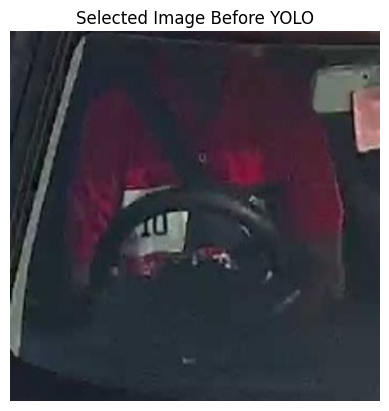

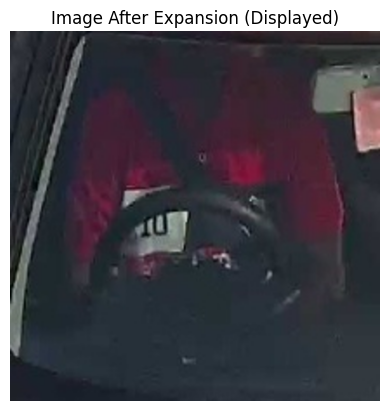


0: 640x640 2 Seat_Belts, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Results: [ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'Seat_Belt'}
obb: None
orig_img: array([[[31, 30, 35],
        [32, 31, 36],
        [33, 32, 37],
        ...,
        [74, 63, 61],
        [74, 63, 61],
        [74, 63, 61]],

       [[31, 30, 35],
        [32, 31, 36],
        [33, 32, 37],
        ...,
        [73, 62, 60],
        [73, 62, 60],
        [73, 62, 60]],

       [[32, 31, 36],
        [32, 31, 36],
        [34, 32, 37],
        ...,
        [70, 59, 57],
        [70, 59, 57],
        [70, 59, 57]],

       ...,

       [[30, 33, 40],
        [30, 33, 40],
        [30, 33, 40],
        ...,
        [53, 60, 66],
        [53, 60, 66],
        [53, 60, 66]],

       [[30, 33, 40],
        [30, 33, 40],
        [30, 33, 40],
        ...,
   

UnboundLocalError: local variable 'out' referenced before assignment

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import shap
from ultralytics import YOLO

# Load the YOLOv8 segmentation model
model = YOLO("/content/drive/MyDrive/SeatBelt_project/Weights/Seat_Belt_weights_dwconv.pt")

def yolo_predict(images):
    # images = [np.array(image) for image in images]

    # for idx, image in enumerate(images):
    plt.imshow(images[0])
    # plt.title(f"Image {idx + 1} Before YOLO Model")
    plt.axis("off")
    plt.show()

    results = model(images[0])
    masks = [result.masks.data for result in results if result.masks is not None]

    print(f"Results: {results}")
    print(f"Masks shape: {[mask.shape for mask in masks]}")

    if len(masks) == 0:
        return np.zeros((0, 640, 640))  # Return empty mask

    return np.array(masks)

masker = shap.maskers.Image("blur", (640, 640, 3))
explainer = shap.Explainer(yolo_predict, masker)

image_path = r"/content/drive/MyDrive/SeatBelt_project/DATA/testing/Car__006_85_best_win_rider.jpg"
img = Image.open(image_path)
img = img.resize((640, 640))
image = np.array(img)
image_with_batch = np.expand_dims(image, axis=0)

plt.imshow(image)
plt.title("Selected Image Before YOLO")
plt.axis("off")
plt.show()

# Remove the batch dimension for display purposes
image_to_display = image_with_batch[0]
plt.imshow(image_to_display)
plt.title("Image After Expansion (Displayed)")
plt.axis("off")
plt.show()

results = model(image_to_display)

print(f"Results: {results}")

try:
    shap_values = explainer(image_with_batch, max_evals=20)
    shap.image_plot(shap_values, image)
except AssertionError as e:
    print("No detections found, cannot generate SHAP values:", e)

###YoloV8-Explainer

In [ ]:
! pip install YOLOv8-Explainer -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 44.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 870.5/870.5 kB 51.9 MB/s eta 0:00:00



Device being used: cpu

Generating heatmaps using GradCAM...
Generating heatmap for Layer 0 (Conv) using GradCAM...
customYOLOv8n summary: 225 layers, 1071427 parameters, 0 gradients
'int' object has no attribute 'backward'
Generating heatmap for Layer 1 (DWConv) using GradCAM...
customYOLOv8n summary: 225 layers, 1071427 parameters, 0 gradients
'int' object has no attribute 'backward'
Generating heatmap for Layer 2 (C2f) using GradCAM...
customYOLOv8n summary: 225 layers, 1071427 parameters, 0 gradients
'int' object has no attribute 'backward'
Generating heatmap for Layer 3 (DWConv) using GradCAM...
customYOLOv8n summary: 225 layers, 1071427 parameters, 0 gradients
'int' object has no attribute 'backward'
Generating heatmap for Layer 4 (C2f) using GradCAM...
customYOLOv8n summary: 225 layers, 1071427 parameters, 0 gradients
'int' object has no attribute 'backward'
Generating heatmap for Layer 5 (DWConv) using GradCAM...
customYOLOv8n summary: 225 layers, 1071427 parameters, 0 gradien

TypeError: Image data of dtype object cannot be converted to float

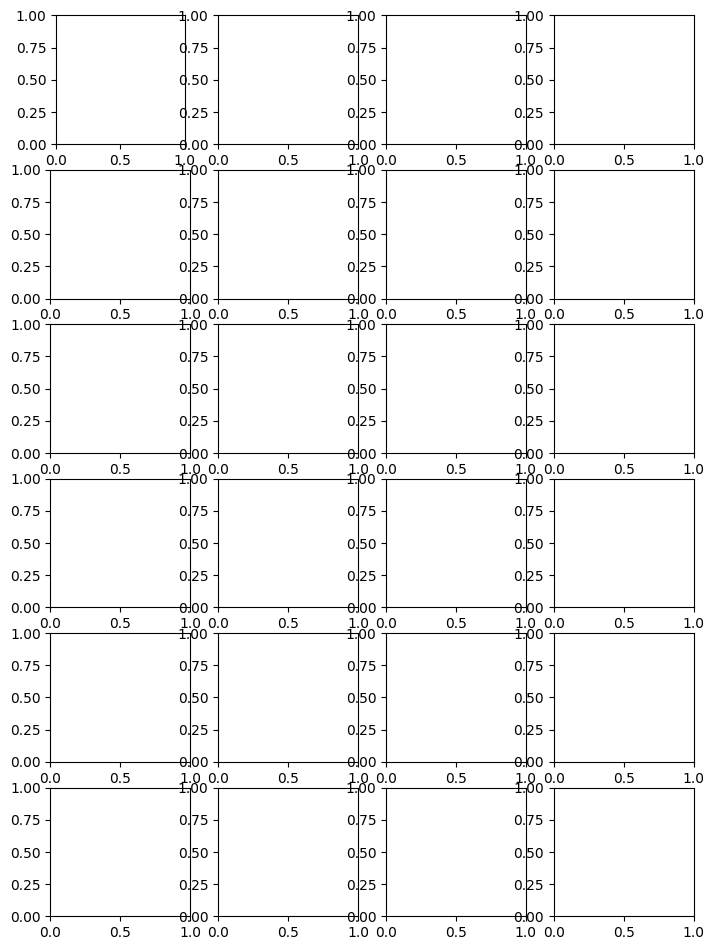

In [ ]:
import torch
from YOLOv8_Explainer import yolov8_heatmap
from ultralytics import YOLO  # Import the YOLO model from ultralytics
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from PIL import Image, ImageDraw, ImageFont

# List of CAM methods to try
cam_methods = ["GradCAM", "GradCAMPlusPlus", "XGradCAM", "LayerCAM", "HiResCAM"]

# Path to model weights and image dataset
model_weight_path = "/content/drive/MyDrive/SeatBelt_project/Weights/Seat_Belt_weights_dwconv.pt"
image_path = "/content/drive/MyDrive/SeatBelt_project/DATA/testing/Car__001_89_best_win_rider.jpg"

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("\nDevice being used:", device)

# Map layer indices to module names (adjust as per your model summary)
target_layers = {
    0: "Conv", 1: "DWConv", 2: "C2f", 3: "DWConv", 4: "C2f",
    5: "DWConv", 6: "C2f", 7: "DWConv", 8: "C2f", 9: "SPPF",
    10: "Upsample", 11: "Concat", 12: "C2f", 13: "Upsample",
    14: "Concat", 15: "C2f", 16: "DWConv", 17: "Concat",
    18: "C2f", 19: "DWConv", 20: "Concat", 21: "C2f"
}

# Dictionary to hold all heatmaps for each method and layer
all_heatmaps = {}

# Generate heatmaps and save them to the dictionary
for method in cam_methods:
    print(f"\nGenerating heatmaps using {method}...")

    # Initialize the model for each CAM method
    for layer_idx, module_name in target_layers.items():
        print(f"Generating heatmap for Layer {layer_idx} ({module_name}) using {method}...")

        # Generate heatmap for the specified layer using the current CAM method
        model = yolov8_heatmap(
            weight=model_weight_path,
            conf_threshold=0.4,
            device=device,
            method=method,
            layer=[layer_idx],  # Specify the current layer for CAM
            ratio=0.5,
            show_box=False,  # Do not show bounding boxes on the heatmaps
            renormalize=False,
        )

        # Generate the heatmap for the given image
        heatmap_images = model(img_path=image_path)

        # Store the heatmaps in a dictionary
        if method not in all_heatmaps:
            all_heatmaps[method] = []
        all_heatmaps[method].append((f"Layer {layer_idx} ({module_name})", heatmap_images))

# Custom function to draw a bounding box and confidence on an image
def draw_bounding_box(image_path, box, confidence, color='red', thickness=3):
    """
    Draws a bounding box and confidence score on the image.

    Parameters:
    - image_path: Path to the image file.
    - box: Bounding box coordinates [xmin, ymin, xmax, ymax].
    - confidence: Confidence score to display above the box.
    - color: Color of the bounding box (default is red).
    - thickness: Thickness of the bounding box line (default is 3).
    """
    # Open the image
    img = Image.open(image_path)
    draw = ImageDraw.Draw(img)

    # Draw the bounding box
    xmin, ymin, xmax, ymax = box
    for i in range(thickness):  # For thicker lines
        draw.rectangle([xmin-i, ymin-i, xmax+i, ymax+i], outline=color)

    # Load a font
    try:
        font = ImageFont.truetype("arial.ttf", 20)  # Specify a font if available
    except IOError:
        font = ImageFont.load_default()  # Fallback to default font

    # Draw the confidence score above the box
    text = f"Conf: {confidence:.2f}"
    text_bbox = draw.textbbox((xmin, ymin), text, font=font)  # Get the bounding box of the text
    text_width, text_height = text_bbox[2] - text_bbox[0], text_bbox[3] - text_bbox[1]
    text_position = (xmin, ymin - text_height - 5)  # Adjust position above the box
    draw.text(text_position, text, fill=color, font=font)

    return img

# Create a PDF file to store the results
with PdfPages("all_cam_methods_heatmaps.pdf") as pdf:
    for method, heatmaps in all_heatmaps.items():
        # Set up a 6x4 grid for 24 images (or fewer)
        fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(8.3, 11.7))  # A4 size: 8.3 x 11.7 inches
        axes = axes.flatten()

        i = 0
        for layer_name, heatmap_images in heatmaps:
            if i < len(axes):  # Ensure it doesn't exceed the number of axes
                axes[i].imshow(heatmap_images[0])  # Assuming heatmap_images is a list of images
                axes[i].set_title(f"{method} - {layer_name}", fontsize=8)  # Smaller font for title
                axes[i].axis('off')  # Hide axes for cleaner look
                i += 1

        # Fill remaining empty slots with blank space
        for j in range(i, len(axes)):
            axes[j].axis('off')

        # Adjust layout and save the current figure to the PDF
        plt.tight_layout(pad=1.0)
        pdf.savefig(fig)  # Save the figure to the PDF
        plt.close(fig)  # Close the figure to save memory

    # At the end, add the YOLO model output with the highest confidence bounding box
    print("\nGenerating YOLO model output with the highest confidence bounding box...")

    # Load the YOLOv8 model from Ultralytics
    yolo_model = YOLO(model_weight_path)

    # Perform inference using YOLO and get the prediction results
    results = yolo_model(image_path)

    # Extract the boxes and confidences
    boxes = results[0].boxes.xyxy.cpu().numpy()  # Get the bounding boxes
    confidences = results[0].boxes.conf.cpu().numpy()  # Get the confidence scores

    # Select the bounding box with the highest confidence
    max_conf_idx = confidences.argmax()
    highest_conf_box = boxes[max_conf_idx]
    highest_conf_score = confidences[max_conf_idx]

    # Draw the highest confidence box on the original image with confidence
    img_with_box = draw_bounding_box(image_path, highest_conf_box, highest_conf_score)  # Custom function to draw the box and confidence

    # Create a final figure for the YOLO result
    fig, ax = plt.subplots(figsize=(8.3, 11.7))  # A4 size
    ax.imshow(img_with_box)  # Display image with the highest confidence bounding box and score
    ax.set_title("YOLO Model Output - Highest Confidence Bounding Box", fontsize=12)
    ax.axis('off')  # Hide axes

    # Save this final figure to the PDF
    pdf.savefig(fig)
    plt.close(fig)  # Close the figure to save memory

    print("\nPDF with all heatmaps and YOLO model output with the highest confidence bounding box generated: all_cam_methods_heatmaps.pdf")


In [ ]:
import os
from glob import glob

# Path to the folder containing the images
image_folder = "/content/drive/MyDrive/SeatBelt_project/DATA/testing/"

# Get all image paths from the folder
image_paths = glob(os.path.join(image_folder, "*.jpg"))

# Iterate through each image in the folder
for image_path in image_paths:
    print(f"Processing image: {image_path}")

    # Perform inference on the image using YOLO
    results = yolo_model(image_path)

    # Extract the bounding boxes and confidence scores
    boxes = results[0].boxes.xyxy.cpu().numpy()  # Bounding boxes
    confs = results[0].boxes.conf.cpu().numpy()  # Confidence scores

    # Print out the results for the current image
    print(f"Bounding Boxes: {boxes}")
    print(f"Confidence Scores: {confs}")
    print("\n")

Processing image: /content/drive/MyDrive/SeatBelt_project/DATA/testing/Car__001_89_best_win_rider.jpg

image 1/1 /content/drive/MyDrive/SeatBelt_project/DATA/testing/Car__001_89_best_win_rider.jpg: 640x608 1 Seat_Belt, 520.6ms
Speed: 5.1ms preprocess, 520.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 608)
Bounding Boxes: [[     84.997      47.653      165.75      145.55]]
Confidence Scores: [    0.30429]


Processing image: /content/drive/MyDrive/SeatBelt_project/DATA/testing/Car__002_90_best_win_rider.jpg

image 1/1 /content/drive/MyDrive/SeatBelt_project/DATA/testing/Car__002_90_best_win_rider.jpg: 640x544 1 Seat_Belt, 395.7ms
Speed: 3.6ms preprocess, 395.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 544)
Bounding Boxes: [[     64.417      24.054      137.42      121.33]]
Confidence Scores: [    0.67524]


Processing image: /content/drive/MyDrive/SeatBelt_project/DATA/testing/Car__003_90_best_win_rider.jpg

image 1/1 /content/drive/MyDrive/SeatBelt

In [ ]:
import os
from glob import glob
from PIL import Image, ImageDraw, ImageFont
import torch
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Path to the folder containing the images
image_folder = "/content/drive/MyDrive/SeatBelt_project/DATA/testing/"

# Get all image paths from the folder
image_paths = glob(os.path.join(image_folder, "*.jpg"))

# Load your YOLO model
model_weight_path = "/content/drive/MyDrive/SeatBelt_project/Weights/Seat_Belt_weights_dwconv.pt"
yolo_model = YOLO(model_weight_path)

# Function to draw bounding box and confidence score on an image
def draw_bounding_box(image_path, box, confidence, color='red', thickness=3):
    """
    Draws a bounding box and confidence score on the image.

    Parameters:
    - image_path: Path to the image file.
    - box: Bounding box coordinates [xmin, ymin, xmax, ymax].
    - confidence: Confidence score to display above the box.
    - color: Color of the bounding box (default is red).
    - thickness: Thickness of the bounding box line (default is 3).
    """
    # Open the image
    img = Image.open(image_path)
    draw = ImageDraw.Draw(img)

    # Draw the bounding box
    xmin, ymin, xmax, ymax = box
    for i in range(thickness):  # For thicker lines
        draw.rectangle([xmin-i, ymin-i, xmax+i, ymax+i], outline=color)

    # Load a font
    try:
        font = ImageFont.truetype("arial.ttf", 20)  # Specify a font if available
    except IOError:
        font = ImageFont.load_default()  # Fallback to default font

    # Draw the confidence score above the box
    text = f"Conf: {confidence:.2f}"
    text_bbox = draw.textbbox((xmin, ymin), text, font=font)  # Get the bounding box of the text
    text_width, text_height = text_bbox[2] - text_bbox[0], text_bbox[3] - text_bbox[1]
    text_position = (xmin, ymin - text_height - 5)  # Adjust position above the box
    draw.text(text_position, text, fill=color, font=font)

    return img

# Iterate through each image in the folder
for image_path in image_paths:
    print(f"Processing image: {image_path}")

    # Perform inference on the image using YOLO
    results = yolo_model(image_path)

    # Extract the bounding boxes and confidence scores
    boxes = results[0].boxes.xyxy.cpu().numpy()  # Bounding boxes
    confs = results[0].boxes.conf.cpu().numpy()  # Confidence scores

    # Print out the results for the current image
    print(f"Bounding Boxes: {boxes}")
    print(f"Confidence Scores: {confs}")

    # Draw the bounding boxes and confidence scores on the image
    for i, box in enumerate(boxes):
        img_with_box = draw_bounding_box(image_path, box, confs[i])

        # Display the image with bounding boxes and confidence scores
        plt.figure(figsize=(8, 8))
        plt.imshow(img_with_box)
        plt.axis('off')  # Hide axes for a cleaner display
        plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import torch
from YOLOv8_Explainer import yolov8_heatmap, display_images

# List of CAM methods to try
# cam_methods = ["GradCAM", "GradCAMPlusPlus", "HiResCAM", "XGradCAM", "LayerCAM", "EigenGradCAM", "EigenCAM"]
cam_methods = ["GradCAM"]

# Path to model weights and image dataset
model_weight_path = "/content/drive/MyDrive/SeatBelt_project/Weights/Seat_Belt_weights_dwconv.pt"
image_path = "/content/drive/MyDrive/SeatBelt_project/DATA/testing/Car__011_88_best_win_rider.jpg"

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Get model architecture layers (modify this according to your model loading)
model = yolov8_heatmap(
    weight=model_weight_path,
    conf_threshold=0.4,
    device=device,
    method="GradCAM",  # Default method for initializing
    layer=[],  # We'll dynamically assign layers in the loop
    ratio=0.02,
    show_box=True,
    renormalize=False,
)

# List of layers you want to generate heatmaps for (from your YOLOv8 model)
# In this case, we're focusing on convolutional and feature layers
target_layers = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20, 22]

# Dictionary to hold all heatmaps for each method and layer
all_heatmaps = {}

# Loop through each CAM method
for method in cam_methods:
    print(f"Generating heatmaps using {method}...")

    # Loop through each layer for the current CAM method
    for layer_idx in target_layers:
        print(f"Generating heatmap for Layer {layer_idx} using {method}...")

        # Generate heatmap for the specified layer using the current CAM method
        model = yolov8_heatmap(
            weight=model_weight_path,
            conf_threshold=0.4,
            device=device,
            method=method,
            layer=[layer_idx],  # Specify the current layer for CAM
            ratio=0.02,
            show_box=True,
            renormalize=False,
        )

        # Generate the heatmap for the given image
        heatmap_images = model(img_path=image_path)

        # Store the heatmaps in a dictionary
        if method not in all_heatmaps:
            all_heatmaps[method] = []
        all_heatmaps[method].append((f"Layer {layer_idx}", heatmap_images))

# Display all the heatmaps for each method and layer
for method, heatmaps in all_heatmaps.items():
    print(f"Displaying heatmaps for {method}:")
    for layer_name, heatmap_images in heatmaps:
        print(f"Displaying heatmap for {layer_name}")
        display_images(heatmap_images)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from YOLOv8_Explainer import yolov8_heatmap, display_images
import torch

# List of CAM methods to try
cam_methods = ["GradCAM","HiResCAM","GradCAMPlusPlus","XGradCAM","LayerCAM","EigenGradCAM","EigenCAM" ]

# Path to model weights and image dataset
model_weight_path = "/content/drive/MyDrive/SeatBelt_project/Weights/Seat_Belt_weights_dwconv.pt"
image_path = "/content/drive/MyDrive/SeatBelt_project/DATA/testing/Car__011_88_best_win_rider.jpg"

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Loop through each CAM method
all_images = []
for method in cam_methods:
    print(f"Generating heatmap using {method}...")

    # Generate heatmap using the specified CAM method
    model = yolov8_heatmap(
        weight="/content/drive/MyDrive/SeatBelt_project/Weights/Seat_Belt_weights_dwconv.pt",
            conf_threshold=0.4,
            device = torch.device("cuda" if torch.cuda.is_available() else "cpu"), # Use torch.device
            method = method,
            layer=[10, 12, 14, 16, 18, -3],
            # backward_type="all",
            ratio=0.02,
            show_box=True,
            renormalize=False,
    )

    # Generate images for the current method
    imagelist = model(
        img_path=image_path,
    )

    # Append images to the collection
    all_images.append((method, imagelist))

# Display all images for each CAM method
for method, imagelist in all_images:
    print(f"Displaying images for {method}:")
    display_images(imagelist)


customYOLOv8n summary: 225 layers, 1071427 parameters, 0 gradients
[<PIL.Image.Image image mode=RGB size=640x576 at 0x7AD1739B1C30>]


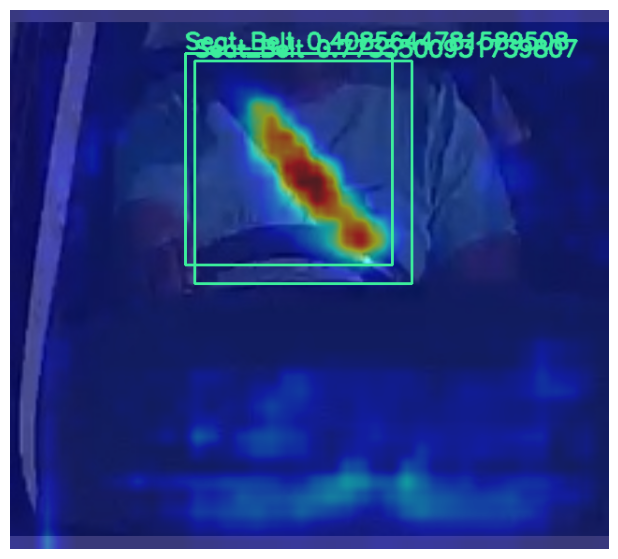

In [ ]:
from YOLOv8_Explainer import yolov8_heatmap, display_images
import torch

model = yolov8_heatmap(
    weight="/content/drive/MyDrive/SeatBelt_project/Weights/Seat_Belt_weights_dwconv.pt",
        conf_threshold=0.4,
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu"), # Use torch.device
        method = "GradCAM",
        layer=[10, 12, 14, 16, 18, -3],
        # backward_type="all",
        ratio=0.02,
        show_box=True,
        renormalize=False,
)

imagelist = model(
    img_path="/content/drive/MyDrive/SeatBelt_project/DATA/testing",
    )

# print(imagelist)

display_images(imagelist)

customYOLOv8n summary: 225 layers, 1071427 parameters, 0 gradients


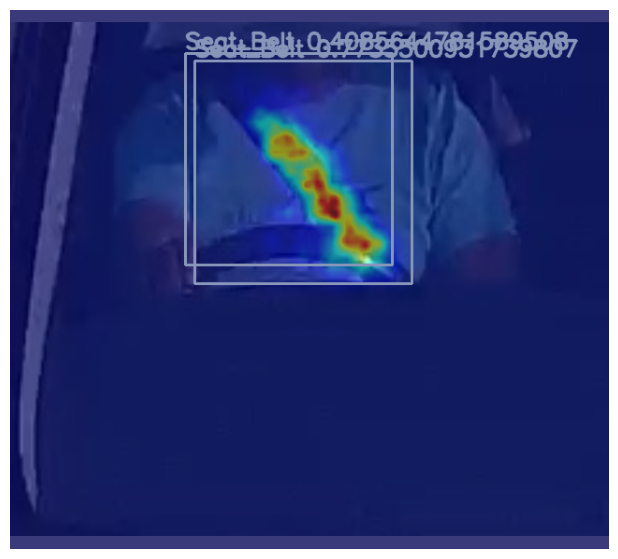

In [ ]:
from YOLOv8_Explainer import yolov8_heatmap, display_images
import torch

model = yolov8_heatmap(
    weight="/content/drive/MyDrive/SeatBelt_project/Weights/Seat_Belt_weights_dwconv.pt",
        conf_threshold=0.4,
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu"), # Use torch.device
        method = "HiResCAM",
        layer=[10, 12, 14, 16, 18, -3],
        # backward_type="all",
        ratio=0.02,
        show_box=True,
        renormalize=False,
)

imagelist = model(
    img_path="/content/drive/MyDrive/SeatBelt_project/DATA/testing/Car__011_88_best_win_rider.jpg",
    )

display_images(imagelist)

customYOLOv8n summary: 225 layers, 1071427 parameters, 0 gradients


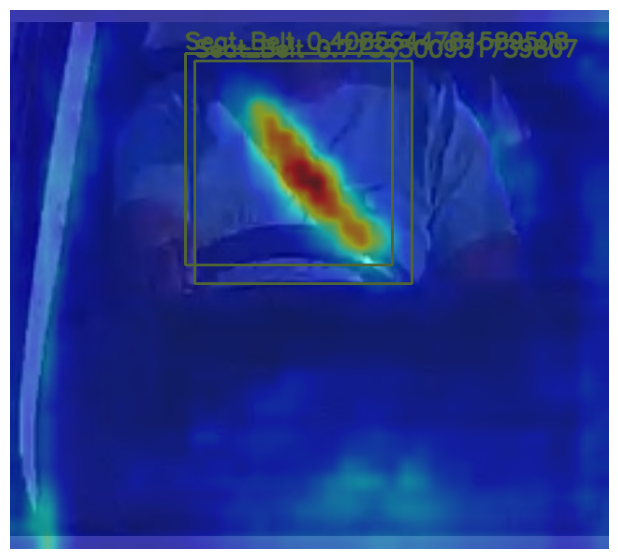

In [ ]:
from YOLOv8_Explainer import yolov8_heatmap, display_images
import torch

model = yolov8_heatmap(
    weight="/content/drive/MyDrive/SeatBelt_project/Weights/Seat_Belt_weights_dwconv.pt",
        conf_threshold=0.4,
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu"), # Use torch.device
        method = "GradCAMPlusPlus",
        layer=[10, 12, 14, 16, 18, -3],
        # backward_type="all",
        ratio=0.02,
        show_box=True,
        renormalize=False,
)

imagelist = model(
    img_path="/content/drive/MyDrive/SeatBelt_project/DATA/testing/Car__011_88_best_win_rider.jpg",
    )

display_images(imagelist)

customYOLOv8n summary: 225 layers, 1071427 parameters, 0 gradients


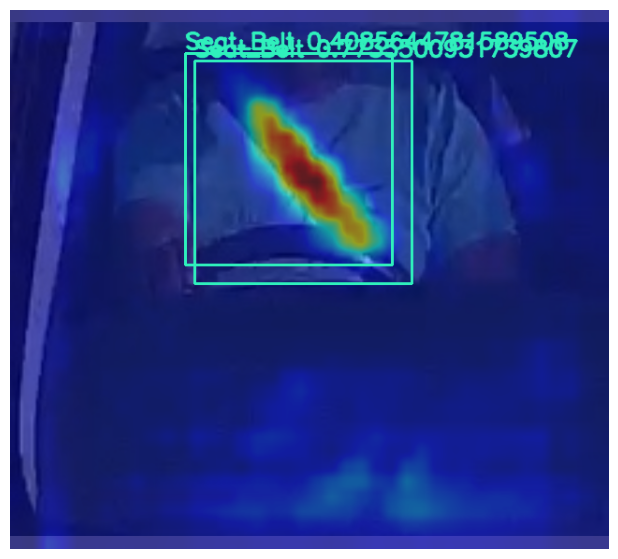

In [ ]:
from YOLOv8_Explainer import yolov8_heatmap, display_images
import torch

model = yolov8_heatmap(
    weight="/content/drive/MyDrive/SeatBelt_project/Weights/Seat_Belt_weights_dwconv.pt",
        conf_threshold=0.4,
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu"), # Use torch.device
        method = "XGradCAM",
        layer=[10, 12, 14, 16, 18, -3],
        # backward_type="all",
        ratio=0.02,
        show_box=True,
        renormalize=False,
)

imagelist = model(
    img_path="/content/drive/MyDrive/SeatBelt_project/DATA/testing/Car__011_88_best_win_rider.jpg",
    )

display_images(imagelist)

customYOLOv8n summary: 225 layers, 1071427 parameters, 0 gradients


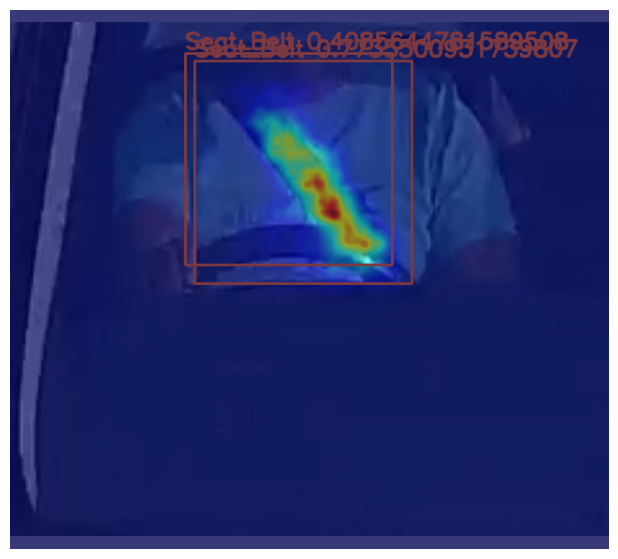

In [ ]:
from YOLOv8_Explainer import yolov8_heatmap, display_images
import torch

model = yolov8_heatmap(
    weight="/content/drive/MyDrive/SeatBelt_project/Weights/Seat_Belt_weights_dwconv.pt",
        conf_threshold=0.4,
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu"), # Use torch.device
        method = "LayerCAM",
        layer=[10, 12, 14, 16, 18, -3],
        # backward_type="all",
        ratio=0.02,
        show_box=True,
        renormalize=False,
)

imagelist = model(
    img_path="/content/drive/MyDrive/SeatBelt_project/DATA/testing/Car__011_88_best_win_rider.jpg",
    )

display_images(imagelist)

customYOLOv8n summary: 225 layers, 1071427 parameters, 0 gradients


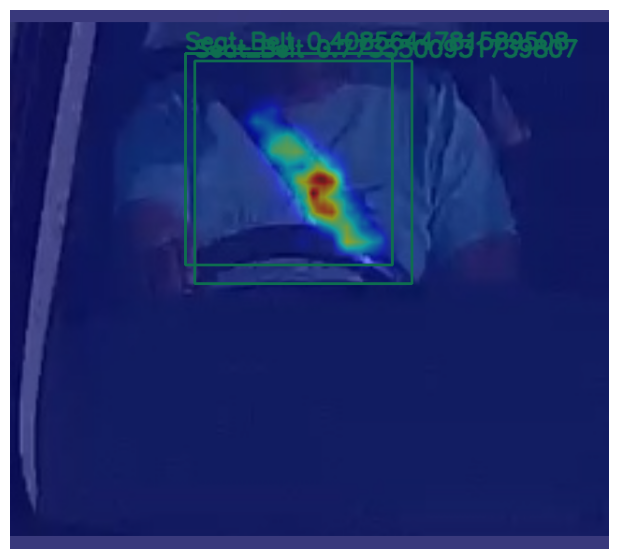

In [ ]:
from YOLOv8_Explainer import yolov8_heatmap, display_images
import torch

model = yolov8_heatmap(
    weight="/content/drive/MyDrive/SeatBelt_project/Weights/Seat_Belt_weights_dwconv.pt",
        conf_threshold=0.4,
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu"), # Use torch.device
        method = "EigenGradCAM",
        layer=[10, 12, 14, 16, 18, -3],
        # backward_type="all",
        ratio=0.02,
        show_box=True,
        renormalize=False,
)

imagelist = model(
    img_path="/content/drive/MyDrive/SeatBelt_project/DATA/testing/Car__011_88_best_win_rider.jpg",
    )

display_images(imagelist)

customYOLOv8n summary: 225 layers, 1071427 parameters, 0 gradients


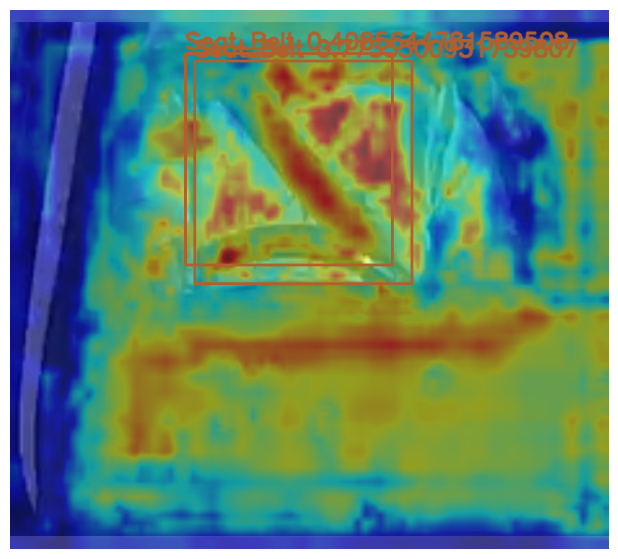

In [ ]:
from YOLOv8_Explainer import yolov8_heatmap, display_images
import torch

model = yolov8_heatmap(
    weight="/content/drive/MyDrive/SeatBelt_project/Weights/Seat_Belt_weights_dwconv.pt",
        conf_threshold=0.4,
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu"), # Use torch.device
        method = "EigenCAM",
        layer=[10, 12, 14, 16, 18, -3],
        # backward_type="all",
        ratio=0.02,
        show_box=True,
        renormalize=False,
)

imagelist = model(
    img_path="/content/drive/MyDrive/SeatBelt_project/DATA/testing/Car__011_88_best_win_rider.jpg",
    )

display_images(imagelist)

###Custom XAI own

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Grad-CAM helper functions
class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None
        self.hooks = []

        self.hook_layers()

    def hook_layers(self):
        def forward_hook(module, input, output):
            self.activations = output

        def backward_hook(module, grad_input, grad_output):
            self.gradients = grad_output[0]

        for name, module in self.model.named_modules():
            if name == self.target_layer:
                self.hooks.append(module.register_forward_hook(forward_hook))
                self.hooks.append(module.register_backward_hook(backward_hook))

    def generate_cam(self, input_tensor, img, target_class=None):
        # Ensure the model is in eval mode for inference and gradients are enabled
        self.model.eval()

        # Copy the image to draw on
        image_with_boxes = img.copy() # Create a copy of the image

        # Convert the numpy array to a PyTorch tensor if it's not already
        if isinstance(input_tensor, np.ndarray):
            input_tensor = torch.from_numpy(input_tensor).float()

        # Ensure the input tensor requires gradients
        input_tensor.requires_grad = True

        # Enable gradient calculation
        with torch.set_grad_enabled(True):
            # Forward pass
            output = self.model(input_tensor)

            # Access the results for the first image (assuming single image input)
            detections = output[0]  # First image's results

            if detections.boxes.shape[0] == 0: # Check if any objects are detected
                print("No objects detected in the image.")
                return None

            for box in detections.boxes:  # Loop through the detected bounding boxes
                x1, y1, x2, y2 = map(int, box.xyxy[0].cpu().numpy())  # Bounding box coordinates
                confidence_score = box.conf.item()  # Confidence score
                class_index = int(box.cls.item())  # Predicted class index

                # Print information about detected object
                class_name = detections.names[class_index]
                print(f"Class Name: {class_name}")

                # Draw bounding boxes and label
                cv2.rectangle(image_with_boxes, (x1, y1), (x2, y2), (0, 255, 0), 2)
                label = f"{class_name}: {confidence_score:.2f}"
                cv2.putText(image_with_boxes, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

            # Convert BGR image to RGB for plotting
            image_rgb = cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB)
            plt.figure(figsize=(12, 8))
            plt.imshow(image_rgb)
            plt.axis('off')
            plt.show()

            # Zero the gradients
            self.model.zero_grad()

            # Perform backward pass on the confidence score of the target class
            if target_class is None:
                target_class = detections.names[class_index]

            # Get the target confidence score
            target = output[0].boxes.conf[class_index]

            # Compute gradients for the target tensor
            target.backward()

            # Access gradients and activations
            gradients = self.gradients.detach().cpu().numpy()
            activations = self.activations.detach().cpu().numpy()

            # Get average gradients
            weights = np.mean(gradients, axis=(2, 3))

            # Compute Grad-CAM
            cam = np.zeros(activations.shape[2:], dtype=np.float32)
            for i, w in enumerate(weights[0]):
                cam += w * activations[0, i, :, :]

            # Normalize and resize the Grad-CAM
            cam = np.maximum(cam, 0)
            cam = cv2.resize(cam, (input_tensor.size(2), input_tensor.size(3)))
            cam = cam - np.min(cam)
            cam = cam / np.max(cam)

        return cam

    # def generate_cam(self, input_tensor, img, target_class=None):
    #     # self.model.eval()

    #     yaml_path = "/content/drive/MyDrive/SeatBelt_project/custom.yaml"
    #     model_path = "/content/drive/MyDrive/SeatBelt_project/customyolov8n.yaml"
    #     project_path = "/content/drive/MyDrive/SeatBelt_project/All_Runs/RUN_DWConv_XAI"
    #     dataset_path = "/content/drive/MyDrive/SeatBelt_project/Robo_datasets/SeatBelt-1"


    #     # self.model.train(mode="train", cfg=yaml_path, data=f"{dataset_path}/data.yaml",epochs=1, imgsz=640, plots=True, project=project_path)
    #     # self.model.eval()
    #     # self.model.train()

    #     # Load the YOLO model with your custom weights
    #     model_path = "/content/drive/MyDrive/SeatBelt_project/Weights/Seat_Belt_weights_dwconv.pt"
    #     model = YOLO(model_path)


    #     # Copy the image to draw on
    #     image_with_boxes = img

    #     # Convert the numpy array to a PyTorch tensor if it's not already
    #     if isinstance(input_tensor, np.ndarray):
    #         input_tensor = torch.from_numpy(input_tensor).float()

    #     # Ensure the input tensor requires gradients
    #     input_tensor.requires_grad = True  # This might be needed if it’s not already set

    #     # Forward pass
    #     output = self.model(input_tensor)

    #     # print("Output:", output[0])

    #     # Access the results for the first image (assuming single image input)
    #     detections = output[0]  # First image's results

    #     # Loop through the detected bounding boxes
    #     for box in detections.boxes:  # boxes attribute contains bounding boxes and confidence scores
    #         print(box)
    #         x1, y1, x2, y2 = map(int,(box.xyxy[0].cpu().numpy()))  # Extract bounding box coordinates
    #         confidence_score = box.conf.item()  # Extract confidence score
    #         class_index = int(box.cls.item())  # Extract the predicted class index

    #         print(f"Bounding Box: {x1}, {y1}, {x2}, {y2}")
    #         print(f"Confidence Score: {confidence_score}")
    #         print(f"Predicted Class Index: {class_index}")

    #         # If you want to print the class name, use the names attribute
    #         class_name = detections.names[class_index]
    #         print(f"Class Name: {class_name}")

    #         # Draw the rectangle
    #         cv2.rectangle(image_with_boxes, (x1, y1), (x2, y2), (0, 255, 0), 2)

    #         # Put the label with confidence score
    #         label = f"{class_name}: {confidence_score:.2f}"
    #         cv2.putText(image_with_boxes, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    #     # Convert BGR image to RGB for plotting
    #     image_rgb = cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB)

    #     # Display the image
    #     plt.figure(figsize=(12, 8))
    #     plt.imshow(image_rgb)
    #     plt.axis('off')
    #     plt.show()


    #     if target_class is None:
    #         target_class = detections.names[class_index]

    #     # Zero the gradients
    #     # self.model.zero_grad()

    #     # Assuming that output contains class scores in tensor format
    #     target = output[0].boxes.conf  # This is a tensor of confidence scores

    #     # Now perform backward pass on the target tensor
    #     target.mean().backward()  # Compute gradients for all bounding boxes

    #     # Get gradients and activations
    #     gradients = self.gradients.detach().cpu().numpy()
    #     activations = self.activations.detach().cpu().numpy()

    #     # Get average gradients
    #     weights = np.mean(gradients, axis=(2, 3))

    #     # Compute the Grad-CAM
    #     cam = np.zeros(activations.shape[2:], dtype=np.float32)
    #     for i, w in enumerate(weights[0]):
    #         cam += w * activations[0, i, :, :]

    #     # Normalize the cam
    #     cam = np.maximum(cam, 0)
    #     cam = cv2.resize(cam, (input_tensor.size(2), input_tensor.size(3)))
    #     cam = cam - np.min(cam)
    #     cam = cam / np.max(cam)

    #     return cam

    # def generate_cam(self, input_tensor, img, target_class=None):
    #     # Ensure the model is in training mode for gradient computation
    #     model = YOLO("/content/drive/MyDrive/SeatBelt_project/Weights/Seat_Belt_weights_dwconv.pt")
    #     model.val(data="/content/drive/MyDrive/SeatBelt_project/Robo_datasets/SeatBelt-1/data.yaml")

    #     # Copy the image to draw on
    #     image_with_boxes = img

    #     # Convert the numpy array to a PyTorch tensor if it's not already
    #     if isinstance(input_tensor, np.ndarray):
    #         input_tensor = torch.from_numpy(input_tensor).float()

    #     # Ensure the input tensor requires gradients
    #     input_tensor.requires_grad = True

    #     # Enable gradient calculation
    #     with torch.set_grad_enabled(True):
    #         # Forward pass
    #         output = model(input_tensor)

    #         # Access the results for the first image (assuming single image input)
    #         detections = output[0]  # First image's results

    #         for box in detections.boxes:  # Loop through the detected bounding boxes
    #             x1, y1, x2, y2 = map(int, box.xyxy[0].cpu().numpy())  # Bounding box coordinates
    #             confidence_score = box.conf.item()  # Confidence score
    #             class_index = int(box.cls.item())  # Predicted class index

    #             # Print information about detected object
    #             class_name = detections.names[class_index]
    #             print(f"Class Name: {class_name}")

    #             # Draw bounding boxes and label
    #             cv2.rectangle(image_with_boxes, (x1, y1), (x2, y2), (0, 255, 0), 2)
    #             label = f"{class_name}: {confidence_score:.2f}"
    #             cv2.putText(image_with_boxes, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    #         # Convert BGR image to RGB for plotting
    #         image_rgb = cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB)
    #         plt.figure(figsize=(12, 8))
    #         plt.imshow(image_rgb)
    #         plt.axis('off')
    #         plt.show()

    #         # Zero the gradients
    #         model.zero_grad()

    #         # Perform backward pass on the confidence score of the target class
    #         if target_class is None:
    #             target_class = detections.names[class_index]

    #         # Assuming that output contains class scores in tensor format
    #         target = output[0].boxes.conf  # Confidence scores


    #         # Compute gradients for the target tensor
    #         target.mean().backward()

    #         # Access gradients and activations
    #         gradients = self.gradients.detach().cpu().numpy()
    #         activations = self.activations.detach().cpu().numpy()

    #         # Get average gradients
    #         weights = np.mean(gradients, axis=(2, 3))

    #         # Compute Grad-CAM
    #         cam = np.zeros(activations.shape[2:], dtype=np.float32)
    #         for i, w in enumerate(weights[0]):
    #             cam += w * activations[0, i, :, :]

    #         # Normalize and resize the Grad-CAM
    #         cam = np.maximum(cam, 0)
    #         cam = cv2.resize(cam, (input_tensor.size(2), input_tensor.size(3)))
    #         cam = cam - np.min(cam)
    #         cam = cam / np.max(cam)

    #     return cam


# Function to visualize the Grad-CAM result
def visualize_gradcam(input_image, cam):
    heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)
    heatmap = np.float32(heatmap) / 255
    overlay_image = heatmap + np.float32(input_image)
    overlay_image = overlay_image / np.max(overlay_image)
    return np.uint8(255 * overlay_image)

# Assuming input_tensor is your input image and 'input_image' is the original image for visualization
# Load an input image and preprocess it for the model
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (640, 640))  # Resize to (640, 640)
    img = image.copy()
    image = np.transpose(image, (2, 0, 1))  # Change from (H, W, C) to (C, H, W)
    image = image / 255.0  # Normalize image
    image = torch.tensor(image).unsqueeze(0).float()  # Add batch dimension (B, C, H, W)
    return image,img

# Usage Example
# Load the YOLO model with your custom weights
model_path = "/content/drive/MyDrive/SeatBelt_project/Weights/Seat_Belt_weights_dwconv.pt"
model = YOLO(model_path)
input_tensor,img = preprocess_image("/content/drive/MyDrive/SeatBelt_project/DATA/testing/Car__011_88_best_win_rider.jpg")

# Initialize Grad-CAM
target_layer = "model.10"  # Specify the target layer name
grad_cam = GradCAM(model, target_layer)

# Generate CAM
cam = grad_cam.generate_cam(input_tensor, img, "Seat_Belt")

# Visualize Grad-CAM on the original image
input_image = input_tensor.squeeze().permute(1, 2, 0).detach().cpu().numpy()
input_image = np.uint8(255 * input_image)
overlay = visualize_gradcam(input_image, cam)

# Plot the result
plt.figure(figsize=(8, 8))
plt.imshow(overlay)
plt.axis("off")
plt.show()

###Easy-Explain

In [ ]:
! pip install easy-explain

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 873.6/873.6 kB 56.4 MB/s eta 0:00:00
  Created wheel for easy-explain: filename=easy_explain-0.5.0-py3-none-any.whl size=30255 sha256=cf0f283798aa29efea2d5a475572ff74e00cb9385183788cf518e7926491d7a2
  Stored in directory: /root/.cache/pip/wheels/3a/10/70/b5d8ec9a956ee9d6ce576d93c335429c23028d1dfc4ee51fd3
Successfully built easy-explain


In [ ]:
from easy_explain import YOLOv8LRP

WARNING ⚠️ Ultralytics settings reset to default values. This may be due to a possible problem with your settings or a recent ultralytics package update. 
View settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.yaml'
Update settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
import torchvision.transforms as transforms
import cv2
from PIL import Image

# Define the desired size for resizing
desired_size = (640, 640)

# Define the transformation pipeline
transform = transforms.Compose([
    transforms.Resize(desired_size),  # Resize to the desired size
    transforms.ToTensor(),            # Convert the image to a tensor
])

# Path to your image
image_path = "/content/SeatBelt_004.jpg"

# Load the image using OpenCV
image = cv2.imread(image_path)

# Convert the image from BGR (OpenCV) to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the NumPy array (OpenCV image) to a PIL image
pil_image = Image.fromarray(image)

# Apply the transformations to the PIL image
image = transform(pil_image)

In [ ]:
lrp = YOLOv8LRP(model, power=2, eps=1, device='cpu')
explanation_lrp = lrp.explain(image, cls='Seat_Belt', contrastive=False).cpu()

In [ ]:
lrp.plot_explanation(frame=image, explanation = explanation_lrp, contrastive=True, cmap='seismic', title='Explanation for Class "traffic light"')

In [ ]:
lrp.plot_explanation(frame=image, explanation = explanation_lrp, contrastive=False, cmap='seismic', title='Explanation for Class "traffic light"')

In [ ]:
lrp.plot_explanation(frame=image, explanation = explanation_lrp, contrastive=False, cmap='Reds', title='Explanation for Class "traffic light"')

## Custom Training

In [ ]:
run_path = "/content/drive/MyDrive/SeatBelt_project/All_Runs"
%cd {run_path}

/content/drive/MyDrive/SeatBelt_project/All_Runs


In [ ]:
# !yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=640 plots=True
# !yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=640 plots=True name="Run"
# !yolo task=detect mode=train model=yolov8s.pt cfg={yaml_path} data={dataset.location}/data.yaml epochs=25 imgsz=640 plots=True name="Run" runs_dir={run_path}

In [ ]:
yaml_path = "/content/drive/MyDrive/SeatBelt_project/custom.yaml"
model_path = "/content/drive/MyDrive/SeatBelt_project/customyolov8n.yaml"
project_path = run_path + "/RUN_DWConv_XAI"
dataset_path = "/content/drive/MyDrive/SeatBelt_project/Robo_datasets/SeatBelt-1"

# last_w_path = "/content/drive/MyDrive/SeatBelt_project/All_Runs/RUN_EP50_BT128/train/weights/best.pt"

In [ ]:
# Train the model with both CPU and GPU
results = model.train(task="detect", mode="train", cfg=yaml_path, data=f"{dataset_path}/data.yaml",
                      epochs=2, imgsz=640, plots=True, project=project_path)

New https://pypi.org/project/ultralytics/8.2.99 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/SeatBelt_project/customyolov8n.yaml, data=/content/drive/MyDrive/SeatBelt_project/Robo_datasets/SeatBelt-1/data.yaml, epochs=2, time=None, patience=50, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/SeatBelt_project/All_Runs/RUN_DWConv_XAI, name=train9, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=True, save_hybrid=False, conf=0.3, iou=0.7, max_det=10, half=False, dnn=False, plots=True, source=None, vid_

100%|██████████| 755k/755k [00:00<00:00, 14.7MB/s]


activation: nn.ReLU()

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1       352  ultralytics.nn.modules.conv.DWConv           [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1      2128  ultralytics.nn.modules.conv.DWConv           [32, 56, 3, 2]                
  4                  -1  2     38080  ultralytics.nn.modules.block.C2f             [56, 56, 2, True]             
  5                  -1  1      6760  ultralytics.nn.modules.conv.DWConv           [56, 104, 3, 2]               
  6                  -1  2    130624  ultralytics.nn.modules.block.C2f             [104, 104, 2, True]           
  7                  -1  1      1144  ultralytics.nn.modules.conv

/content/drive/MyDrive/ultralytics/ultralytics/engine/trainer.py:261: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(enabled=self.amp)
train: Scanning /content/drive/MyDrive/SeatBelt_project/Robo_datasets/SeatBelt-1/train/labels.cache... 1832 images, 793 backgrounds, 0 corrupt: 100%|██████████| 1832/1832 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.16 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/usr/local/lib/python3.10/dist-packages/albumentations/core/composition.py:191: UserWarning: Got processor for bboxes, but no transform to process it.
  self._set_keys()
val: Scanning /content/drive/MyDrive/SeatBelt_project/Robo_datasets/SeatBelt-1/valid/labels.cache... 366 images, 175 backgrounds, 0 corrupt: 100%|██████████| 366/366 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/SeatBelt_project/All_Runs/RUN_DWConv_XAI/train9/labels.jpg... 
optimizer: SGD(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to /content/drive/MyDrive/SeatBelt_project/All_Runs/RUN_DWConv_XAI/train9
Starting training for 2 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/29 [00:00<?, ?it/s]


TypeError: unhashable type: 'numpy.ndarray'

In [ ]:
# !yolo cfg={yaml_path} task=detect mode=train model={model_path} data={dataset_path}/data.yaml epochs=100 imgsz=640 plots=True project={project_path}

In [ ]:
!ls f"{project_path}/train/"

/content/drive/MyDrive/SeatBelt_project/All_Runs/RUN_DWConv


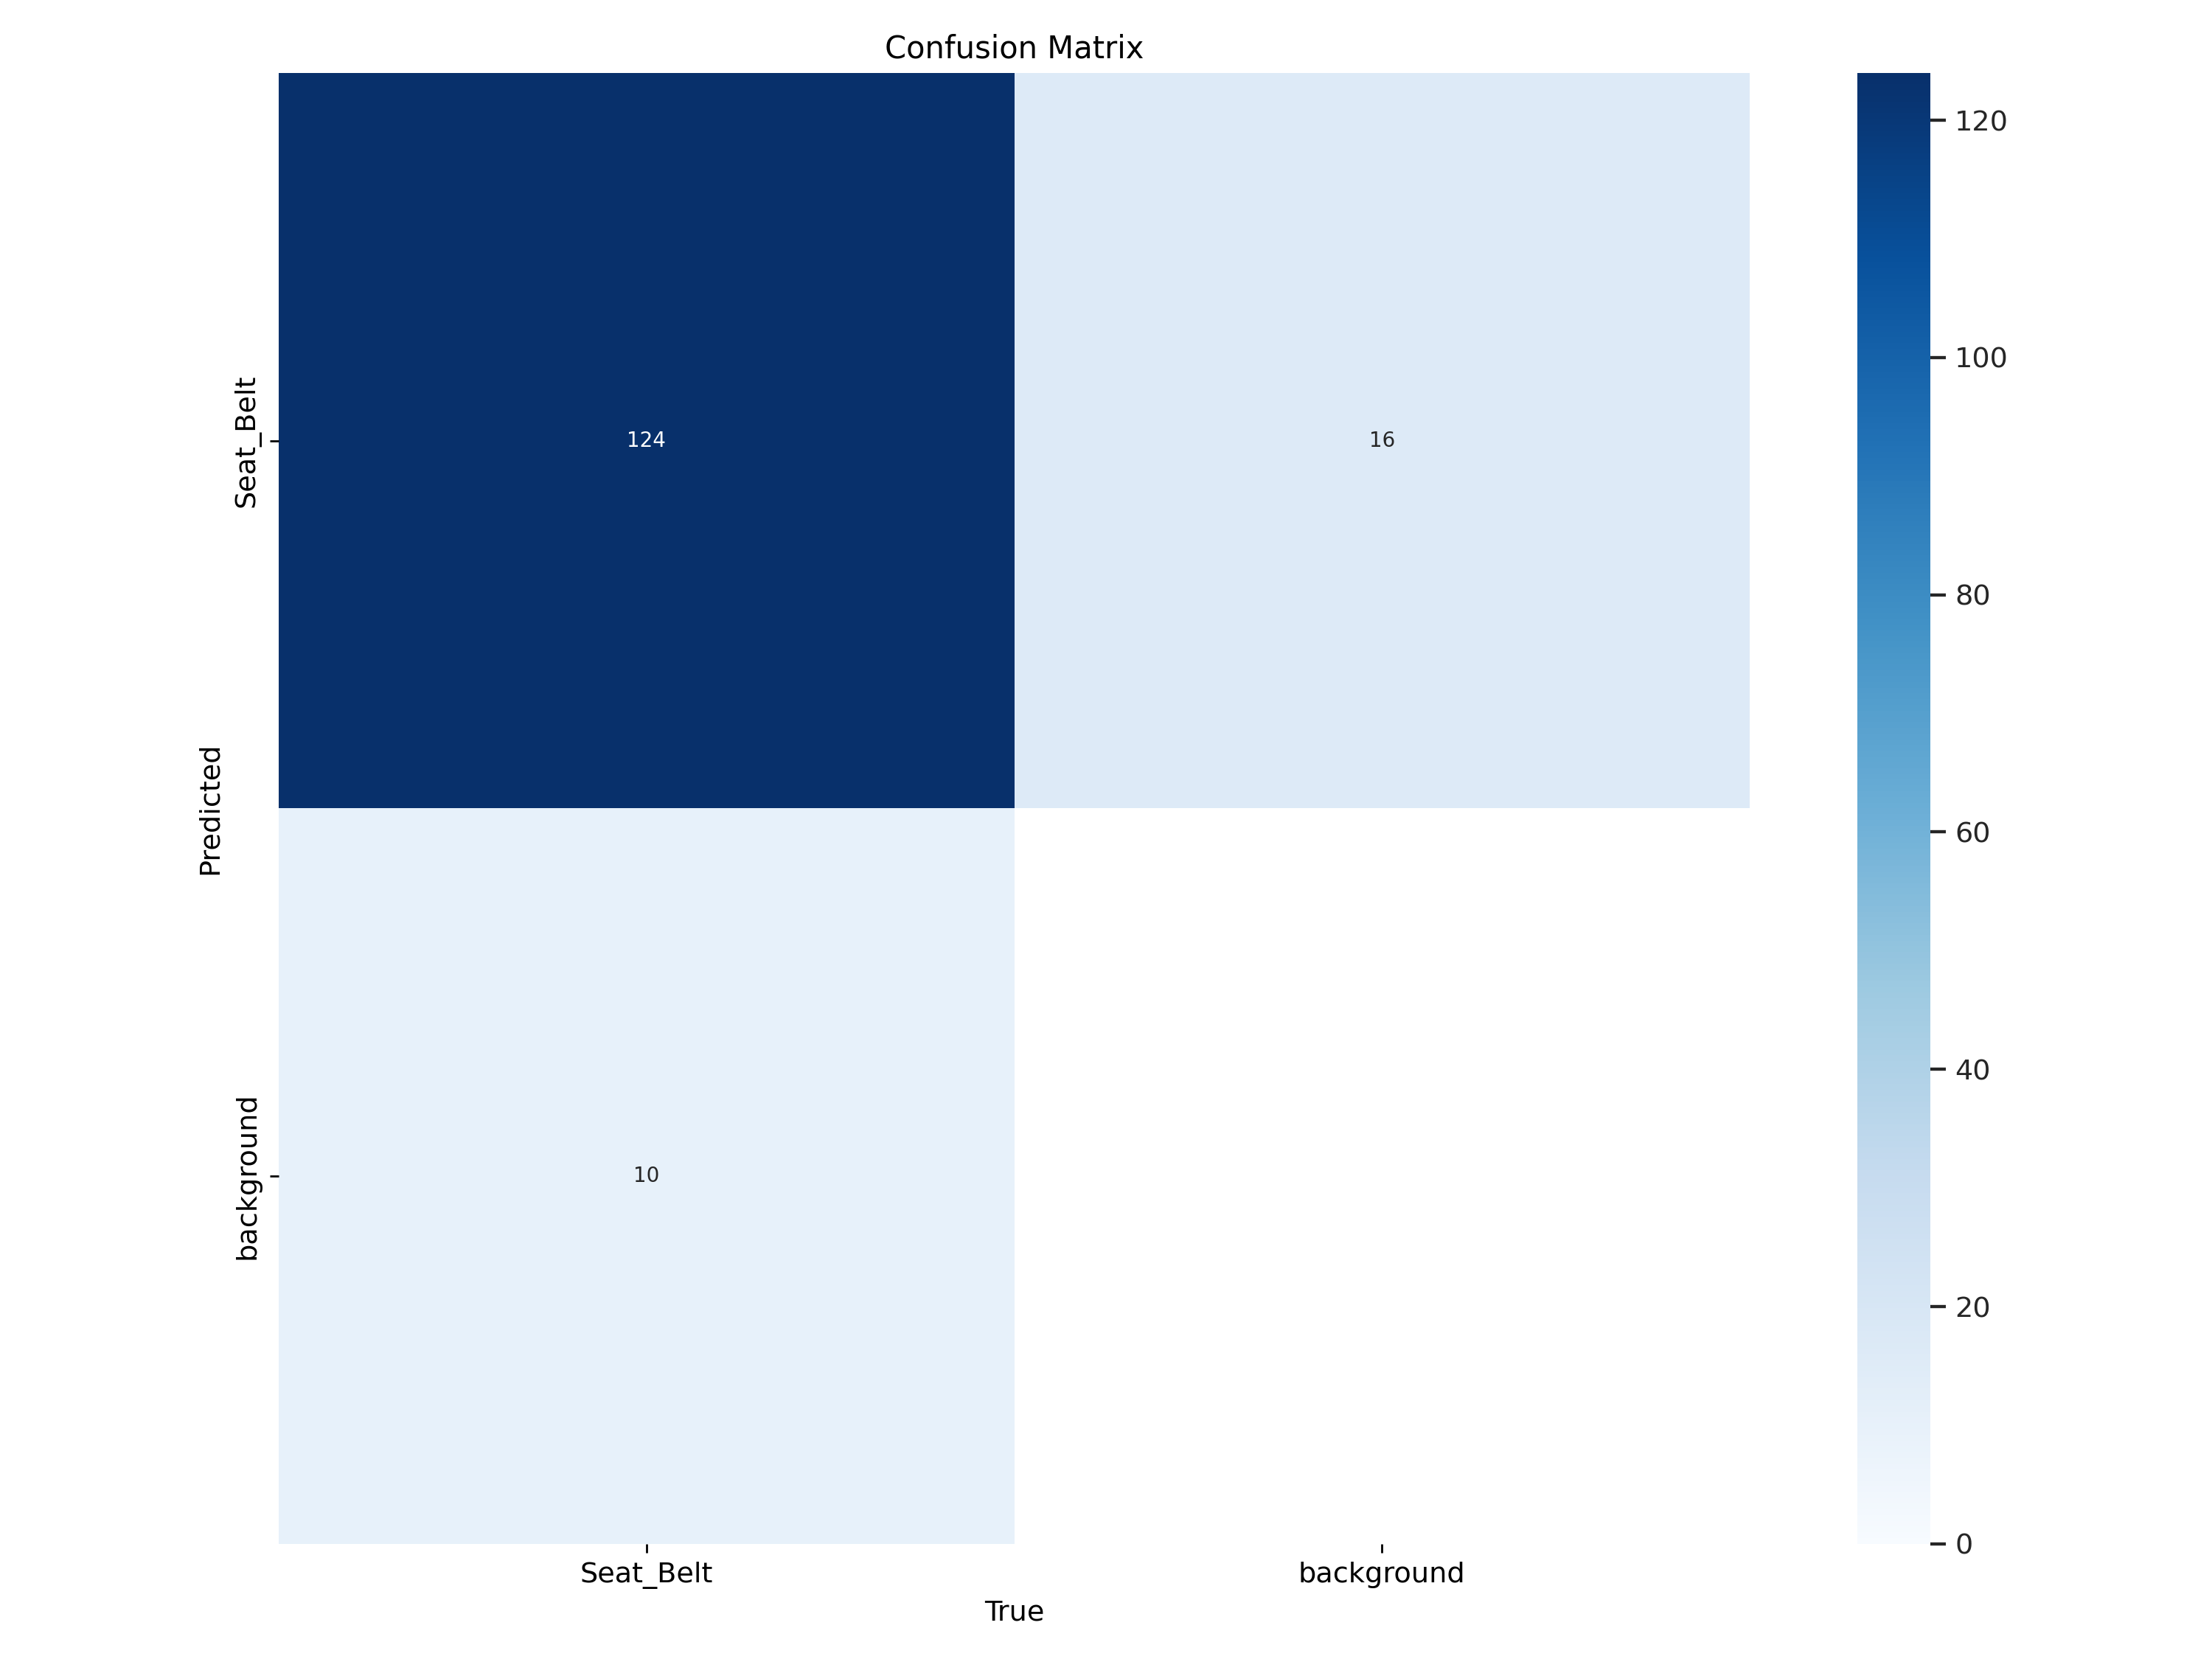

In [ ]:
%cd {project_path}
Image(filename=f'{project_path}/train/confusion_matrix.png', width=600)

/content/drive/MyDrive/SeatBelt_project/All_Runs/RUN_DWConv


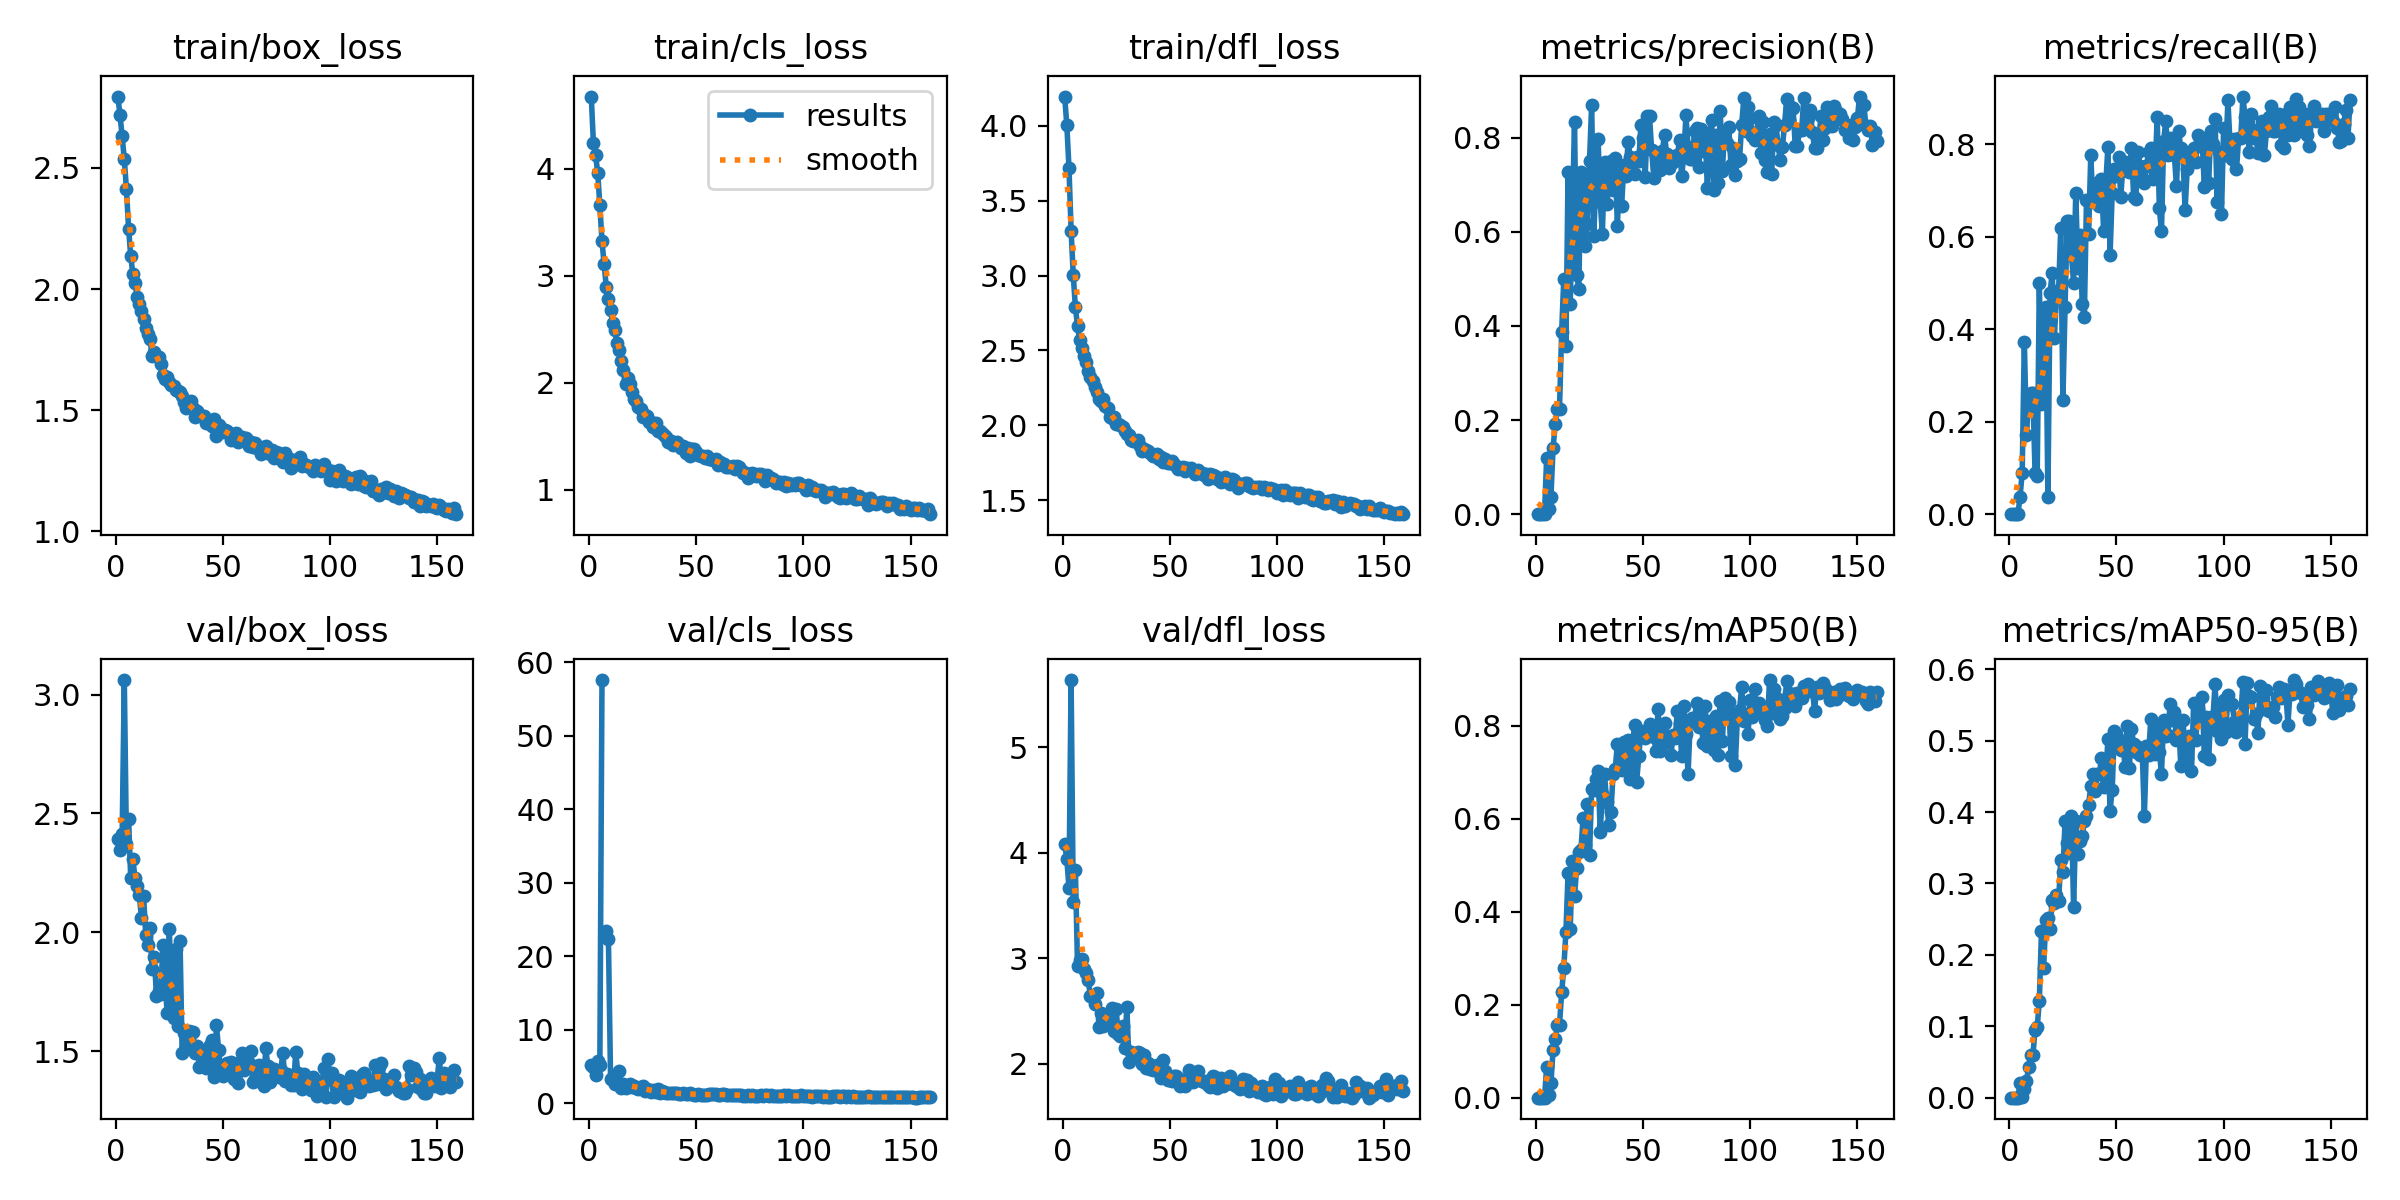

In [ ]:
%cd {project_path}
Image(filename=f'{project_path}/train/results.png', width=600)

/content/drive/MyDrive/SeatBelt_project/All_Runs/RUN_DWConv


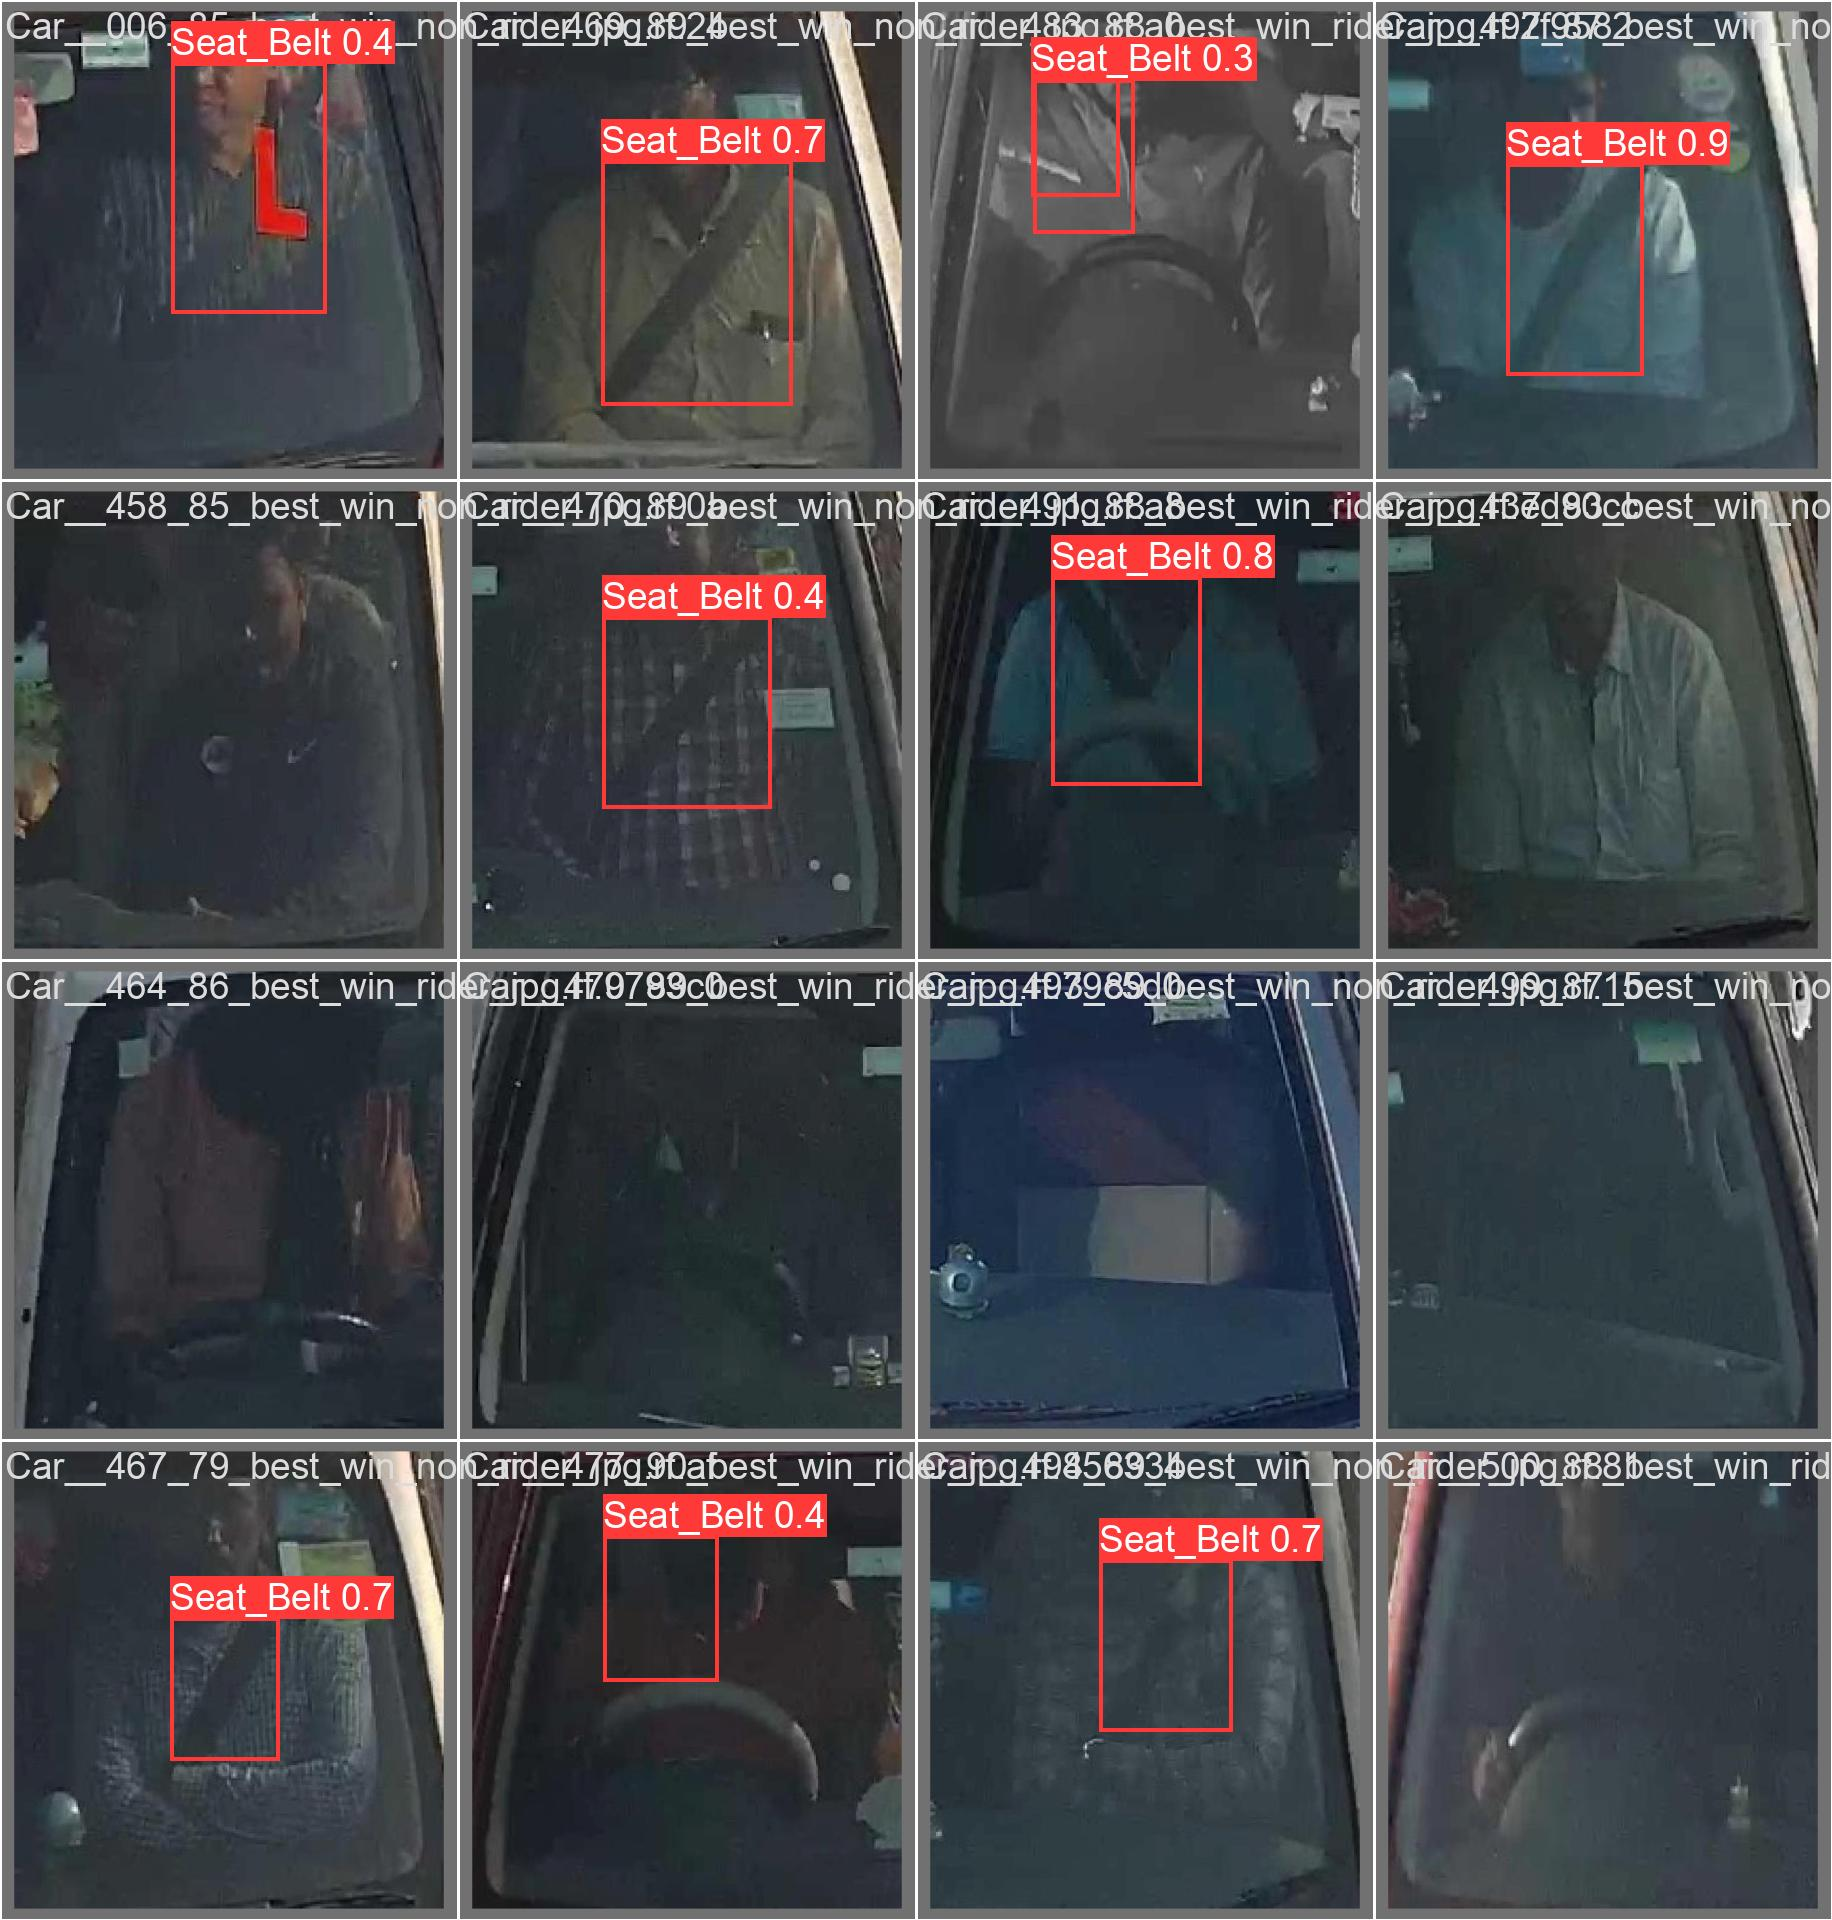

In [ ]:
%cd {project_path}
Image(filename=f'{project_path}/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
# project_path = "/content/drive/MyDrive/SeatBelt_project/All_Runs/Default_run_25"
# dataset_path = "/content/drive/MyDrive/SeatBelt_project/Robo_datasets/SeatBelt-1"

In [ ]:
%cd {project_path}
# Train the model with both CPU and GPU
results = model.val(task="detect", mode="val", model=f"{project_path}/train/weights/best.pt", data=f"{dataset_path}/data.yaml", project=project_path)

# !yolo task=detect mode=val model={project_path}/train/weights/best.pt data={dataset_path}/data.yaml project={project_path}

/content/drive/MyDrive/SeatBelt_project/All_Runs/RUN_DWConv
Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
customYOLOv8n summary (fused): 168 layers, 1067927 parameters, 0 gradients, 4.9 GFLOPs


val: Scanning /content/drive/MyDrive/SeatBelt_project/Robo_datasets/SeatBelt-1/test/labels.cache... 246 images, 112 backgrounds, 0 corrupt: 100%|██████████| 246/246 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.49s/it]


                   all        246        134       0.81      0.903      0.898      0.581
Speed: 0.2ms preprocess, 4.4ms inference, 0.0ms loss, 2.1ms postprocess per image
Saving /content/drive/MyDrive/SeatBelt_project/All_Runs/RUN_DWConv/train2/predictions.json...
Results saved to /content/drive/MyDrive/SeatBelt_project/All_Runs/RUN_DWConv/train2


## Inference with Custom Model

In [ ]:
# from ultralytics import YOLO

# # Load a model
# model = YOLO('yolov8n.pt')  # load an official model
# model = YOLO(project_path +'/train/weights/best.pt')  # load a custom trained model

# # Export the model
# model.export(format='onnx')

In [ ]:
%cd {project_path}
results = model.predict(task="detect", mode="predict", model=f"{project_path}/train/weights/best.pt", source=f"{dataset_path}/test/images", project=project_path,save=True)

# !yolo task=detect mode=predict model={project_path}/train/weights/best.pt conf=0.25 source={dataset_path}/test/images save=True project={project_path}

/content/drive/MyDrive/SeatBelt_project/All_Runs/RUN_DWConv

image 1/246 /content/drive/MyDrive/SeatBelt_project/Robo_datasets/SeatBelt-1/test/images/Car__006_85_best_win_non_rider_jpg.rf.2467f5c00fd1b4797a8428707bd9aac2.jpg: 640x608 1 Seat_Belt, 9.7ms
image 2/246 /content/drive/MyDrive/SeatBelt_project/Robo_datasets/SeatBelt-1/test/images/Car__009_88_best_win_non_rider_jpg.rf.eef3d7e01b71ef51f0df832763dd7046.jpg: 640x608 1 Seat_Belt, 9.6ms
image 3/246 /content/drive/MyDrive/SeatBelt_project/Robo_datasets/SeatBelt-1/test/images/Car__013_87_best_win_rider_jpg.rf.3809af995628bdf3d7301637619020e6.jpg: 640x608 (no detections), 9.0ms
image 4/246 /content/drive/MyDrive/SeatBelt_project/Robo_datasets/SeatBelt-1/test/images/Car__018_88_best_win_non_rider_jpg.rf.c23dd3e681d2b785ffb0b8ff990bf19a.jpg: 640x608 1 Seat_Belt, 9.2ms
image 5/246 /content/drive/MyDrive/SeatBelt_project/Robo_datasets/SeatBelt-1/test/images/Car__019_90_best_win_rider_jpg.rf.9137281d2d55ef786a24bb23a5d94f0b.jpg: 640x608 1 

**NOTE:** Let's take a look at few results.

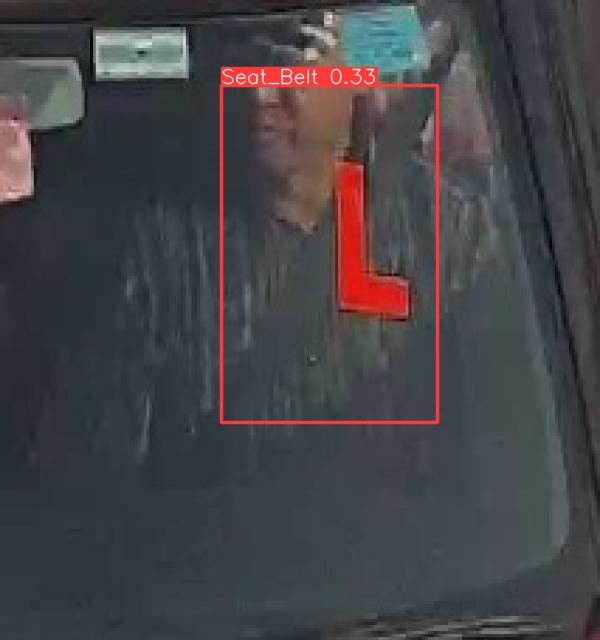

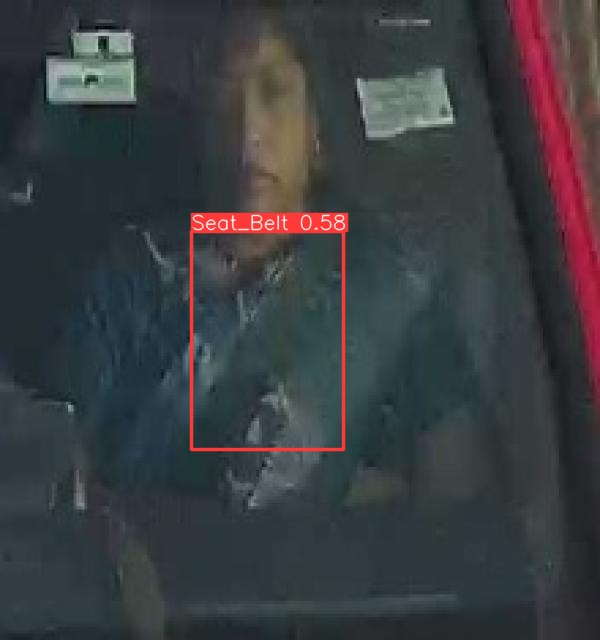

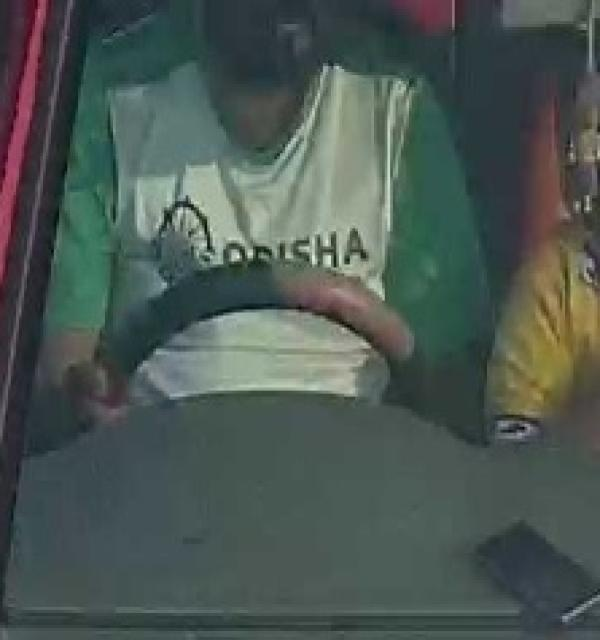

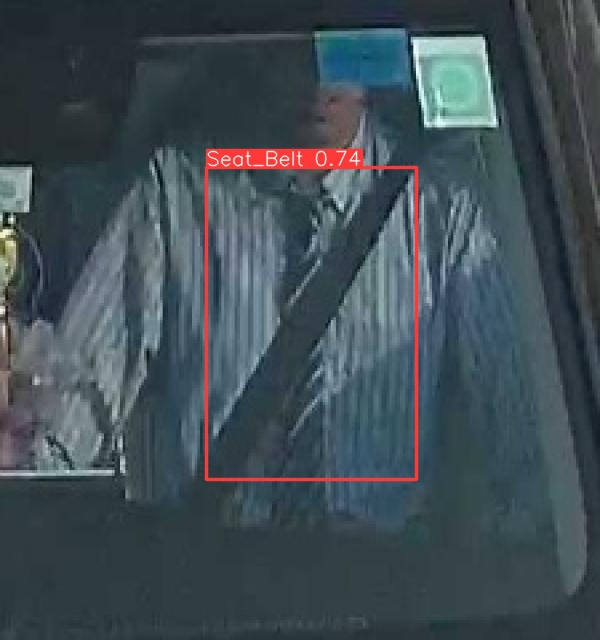

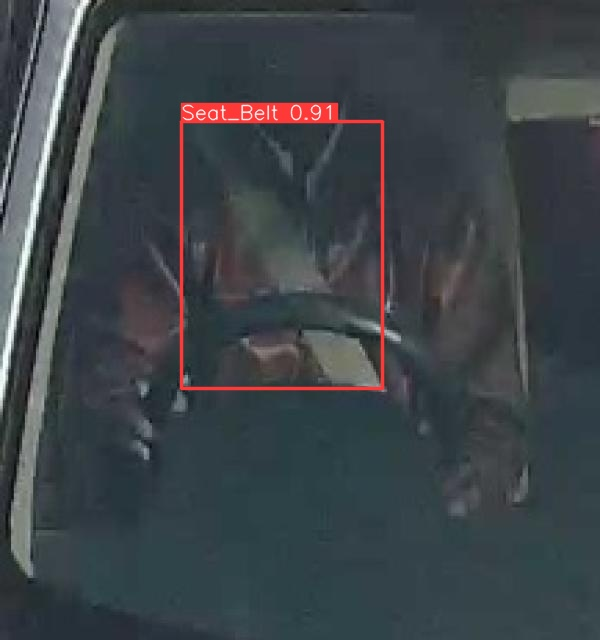

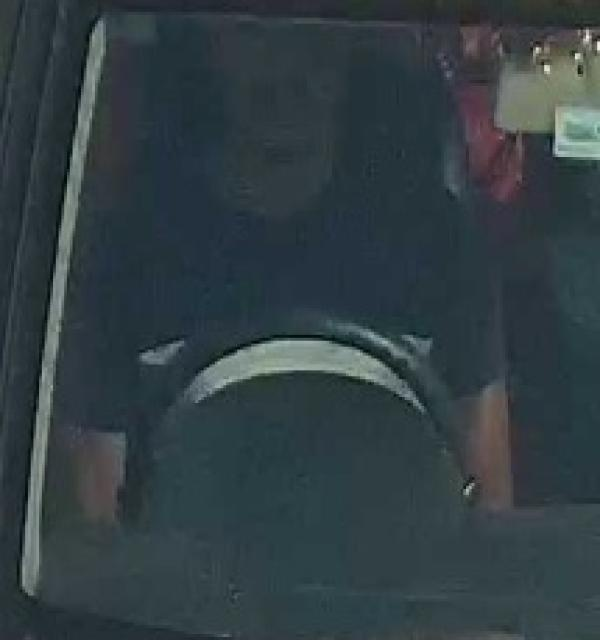

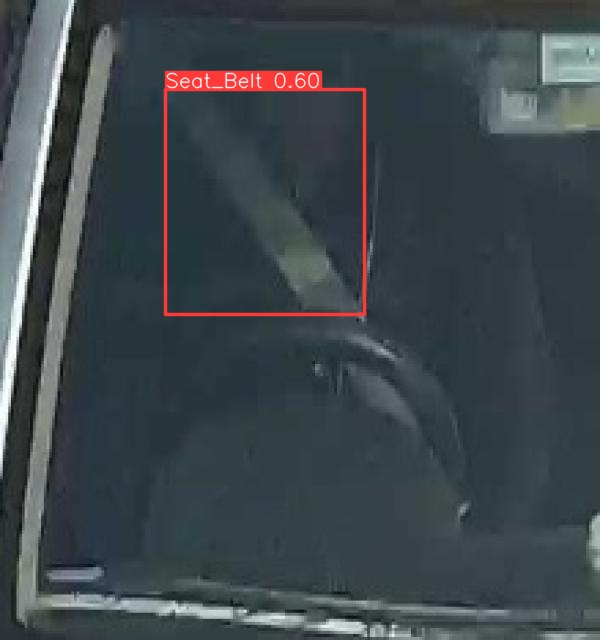

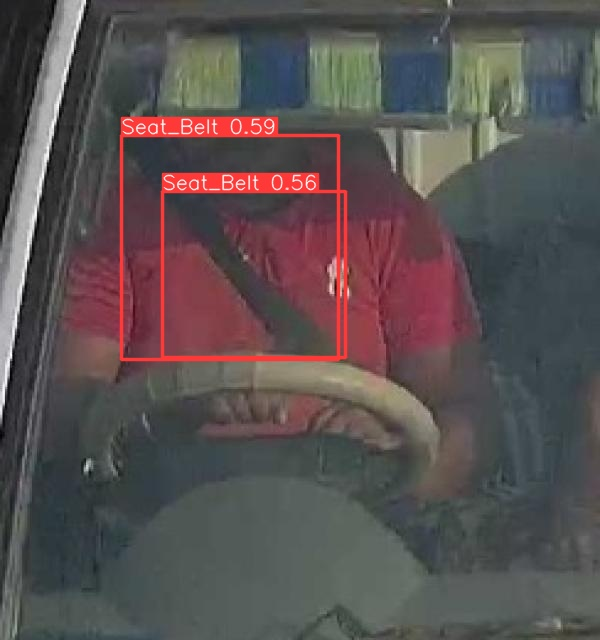

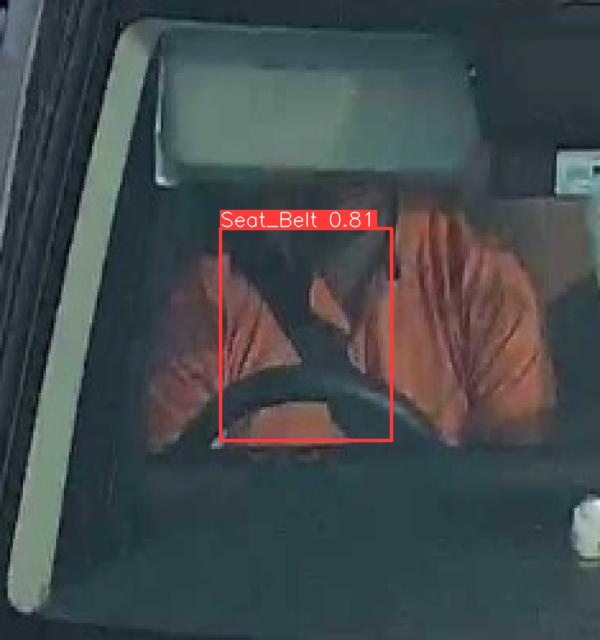

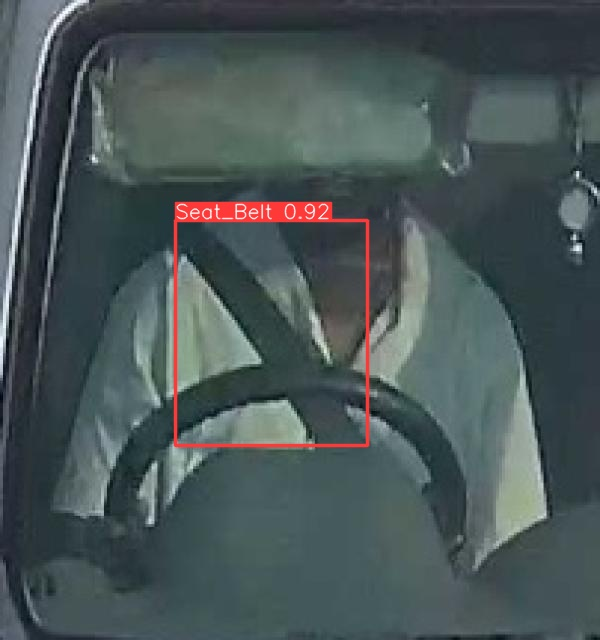

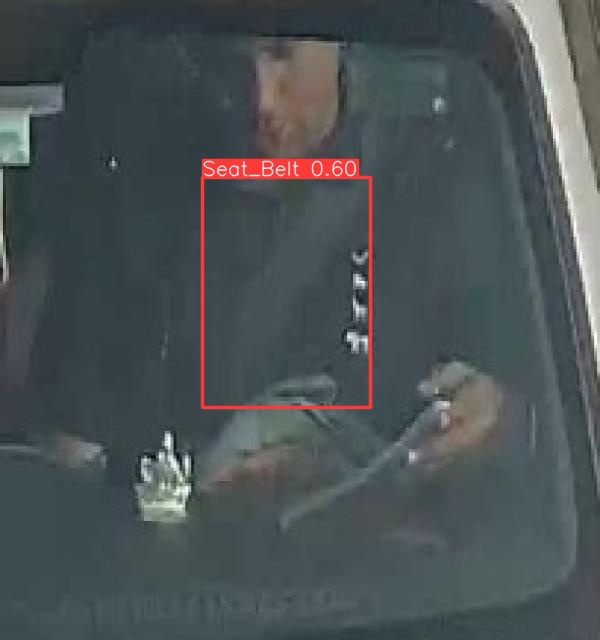

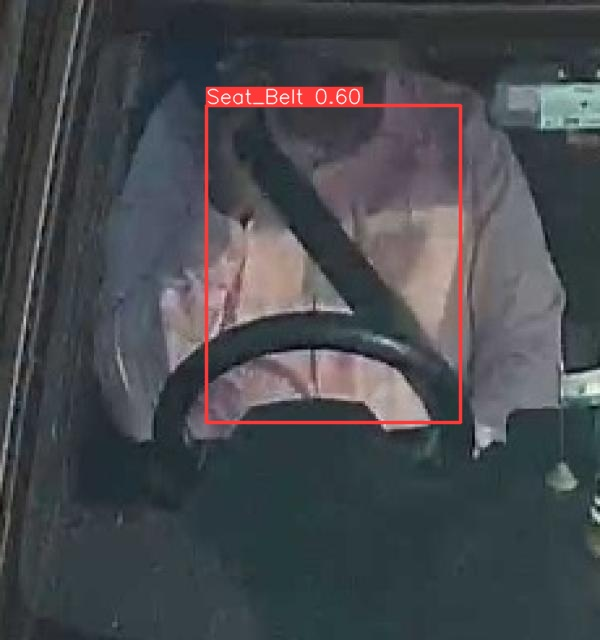

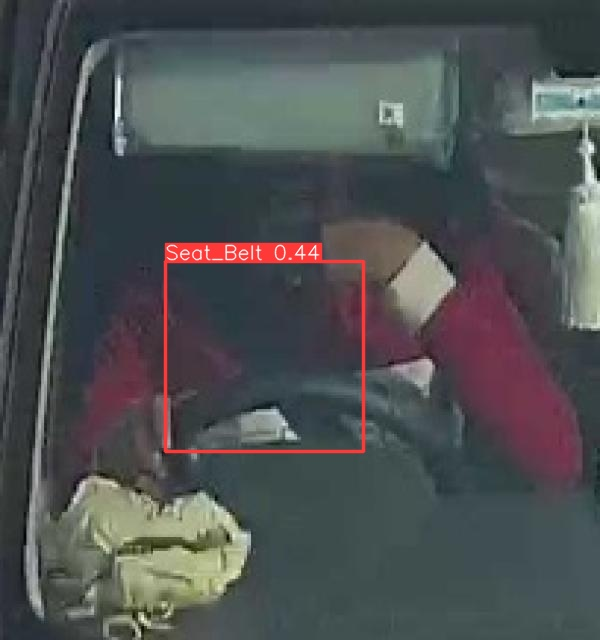

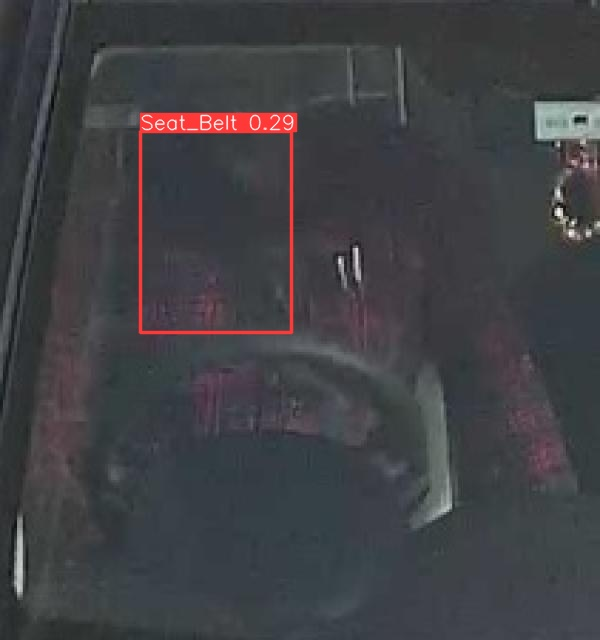

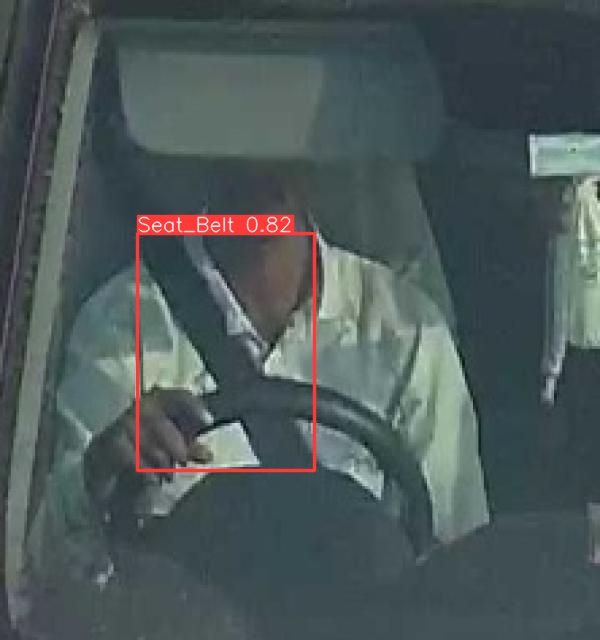

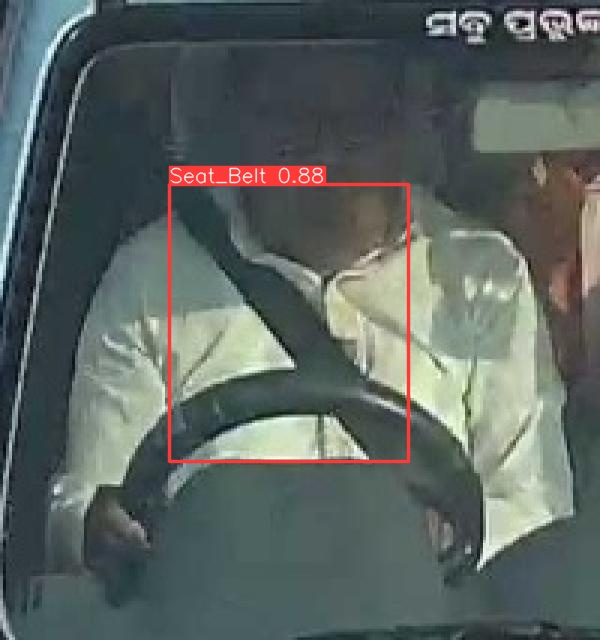

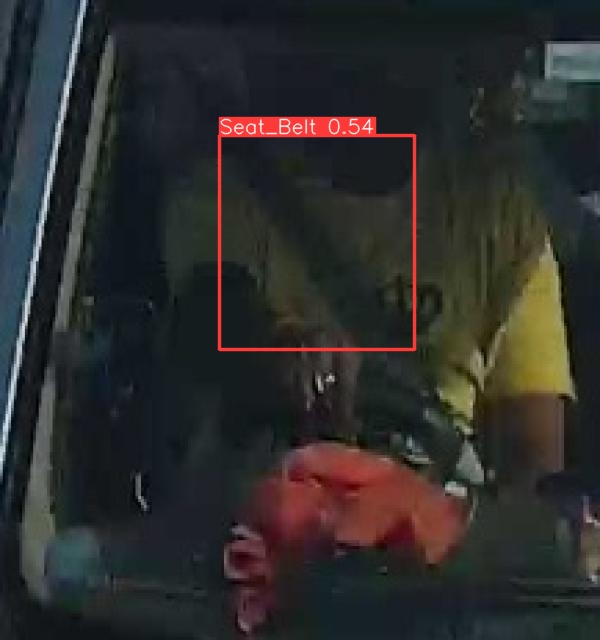

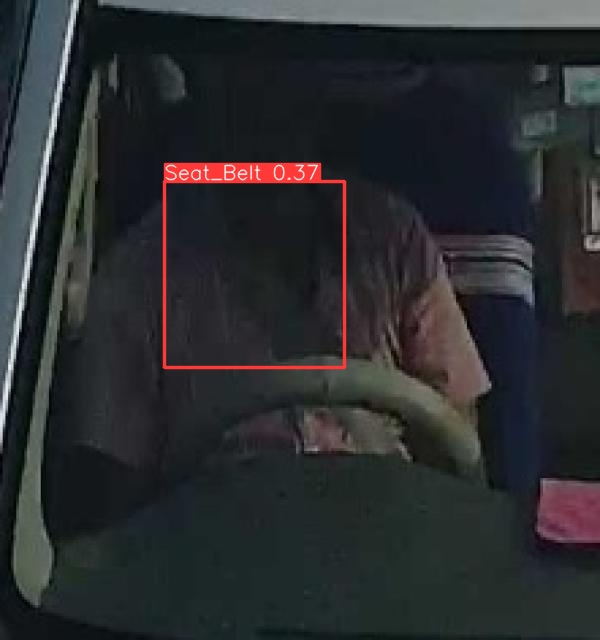

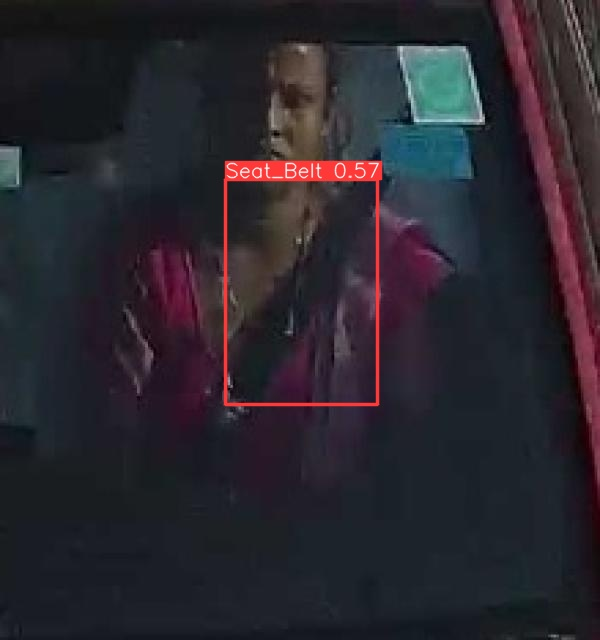

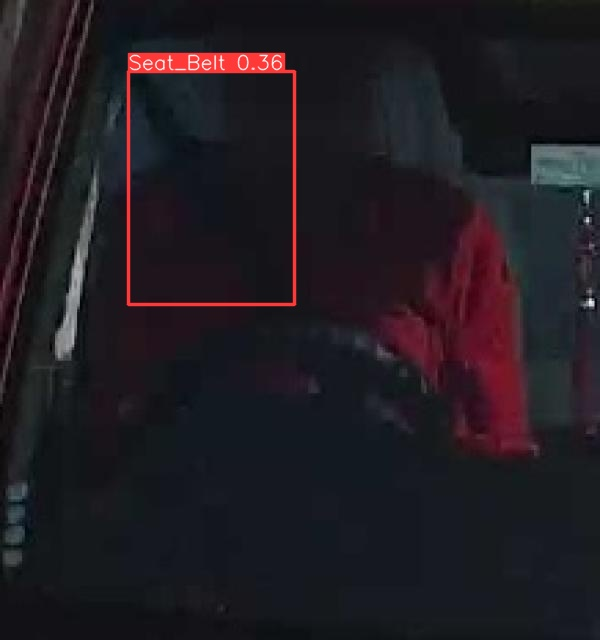

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{project_path}/train3/*.jpg')[:20]:
      display(Image(filename=image_path, width=600))
      print("\n")